In [31]:
# Comprehensive Dataset Analysis for Fungi Classification Challenge
# Dataset Analysis Notebook

import pandas as pd
import numpy as np
from collections import Counter
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Try to import plotting libraries
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    PLOTTING_AVAILABLE = True
    # Set up plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = (12, 8)
except ImportError:
    PLOTTING_AVAILABLE = False
    print("Warning: Matplotlib/Seaborn not available. Visualizations will be skipped.")

print("Dataset Analysis for Fungi Classification Challenge")
print("=" * 50)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Plotting available: {PLOTTING_AVAILABLE}")
print("=" * 50)

Dataset Analysis for Fungi Classification Challenge
Analysis Date: 2025-08-12 16:22:59
Plotting available: True


In [32]:
# 1. LOAD AND EXAMINE MAIN METADATA DATASET
print("1. MAIN METADATA DATASET ANALYSIS")
print("-" * 40)

# Load the main metadata file
metadata_path = '/work3/monka/SummerSchool2025/metadata.csv'
df_metadata = pd.read_csv(metadata_path)

print(f"Dataset shape: {df_metadata.shape}")
print(f"Columns: {list(df_metadata.columns)}")
print("\nFirst 5 rows:")
print(df_metadata.head())

print("\nDataset Info:")
print(df_metadata.info())

print("\nMissing values:")
missing_values = df_metadata.isnull().sum()
print(missing_values)
print(f"\nPercentage of missing values:")
print((missing_values / len(df_metadata) * 100).round(2))

1. MAIN METADATA DATASET ANALYSIS
----------------------------------------
Dataset shape: (36015, 7)
Columns: ['filename_index', 'Habitat', 'Latitude', 'Longitude', 'Substrate', 'eventDate', 'taxonID_index']

First 5 rows:
          filename_index                                            Habitat  \
0  fungi_final000000.jpg  Mixed woodland (with coniferous and deciduous ...   
1  fungi_final000001.jpg                       Unmanaged deciduous woodland   
2  fungi_final000002.jpg                                         Forest bog   
3  fungi_final000003.jpg                     coniferous woodland/plantation   
4  fungi_final000004.jpg                                 Deciduous woodland   

    Latitude  Longitude              Substrate   eventDate  taxonID_index  
0  54.994548  11.958746                   soil  2018-09-01            NaN  
1  54.673140  11.464060                   soil  2013-07-14            NaN  
2  56.123620   9.492040  leaf or needle litter  2011-05-29            NaN 


2. DATASET SPLITS ANALYSIS
----------------------------------------
Dataset split distribution:
dataset_split
train    25863
test      6552
final     3600
Name: count, dtype: int64

Percentages:
dataset_split
train    71.81
test     18.19
final    10.00
Name: count, dtype: float64


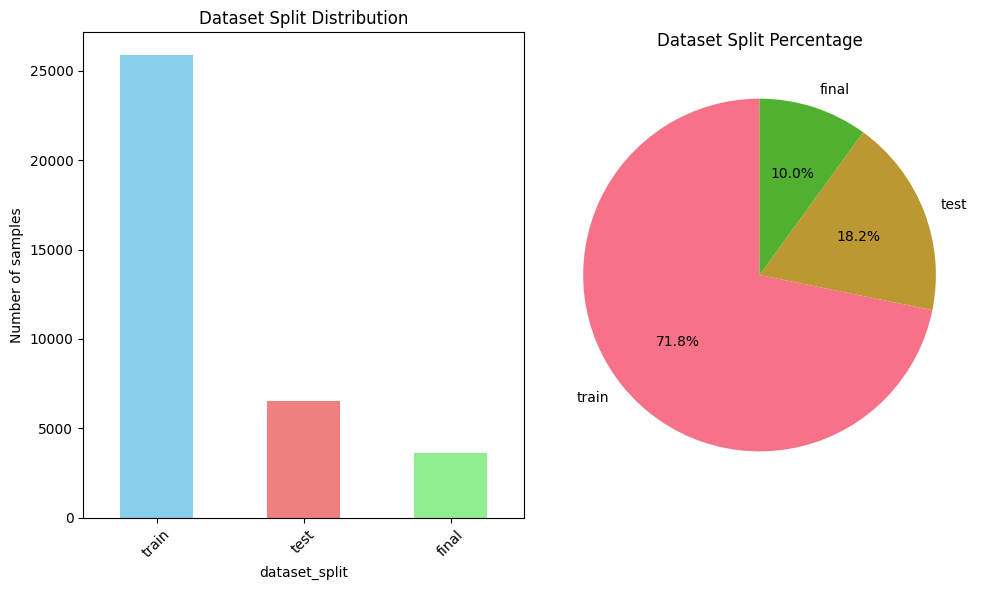


Label availability by dataset split:
final: 0/3600 have labels (0.0%)
test: 0/6552 have labels (0.0%)
train: 25863/25863 have labels (100.0%)


In [33]:
# 2. ANALYZE DATASET SPLITS (Train/Test/Final)
print("\n2. DATASET SPLITS ANALYSIS")
print("-" * 40)

# Extract dataset splits from filename_index
def get_dataset_split(filename):
    if 'train' in filename:
        return 'train'
    elif 'test' in filename:
        return 'test'
    elif 'final' in filename:
        return 'final'
    else:
        return 'unknown'

df_metadata['dataset_split'] = df_metadata['filename_index'].apply(get_dataset_split)

# Count splits
split_counts = df_metadata['dataset_split'].value_counts()
print("Dataset split distribution:")
print(split_counts)
print(f"\nPercentages:")
print((split_counts / len(df_metadata) * 100).round(2))

# Visualize splits if plotting is available
if PLOTTING_AVAILABLE:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    split_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Dataset Split Distribution')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(split_counts.values, labels=split_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Dataset Split Percentage')
    plt.tight_layout()
    plt.show()
else:
    print("\nVisualization skipped (matplotlib not available)")

# Check if labels (taxonID_index) are available by split
print("\nLabel availability by dataset split:")
for split in df_metadata['dataset_split'].unique():
    split_data = df_metadata[df_metadata['dataset_split'] == split]
    missing_labels = split_data['taxonID_index'].isnull().sum()
    total = len(split_data)
    print(f"{split}: {total - missing_labels}/{total} have labels ({((total - missing_labels)/total*100):.1f}%)")


3. HABITAT FEATURE ANALYSIS
----------------------------------------
Number of unique habitats: 29

Unique habitat types:
1. Acidic oak woodland
2. Bog woodland
3. Deciduous woodland
4. Forest bog
5. Mixed woodland (with coniferous and deciduous trees)
6. Thorny scrubland
7. Unmanaged coniferous woodland
8. Unmanaged deciduous woodland
9. Willow scrubland
10. bog
11. coniferous woodland/plantation
12. ditch
13. dune
14. fallow field
15. fertilized field in rotation
16. garden
17. gravel or clay pit
18. heath
19. hedgerow
20. improved grassland
21. lawn
22. meadow
23. natural grassland
24. other habitat
25. park/churchyard
26. roadside
27. roof
28. salt meadow
29. wooded meadow, grazing forest

Habitat frequency distribution:
Habitat
Deciduous woodland                                      3067
Mixed woodland (with coniferous and deciduous trees)    2018
coniferous woodland/plantation                          1627
Unmanaged deciduous woodland                            1164
park/churchy

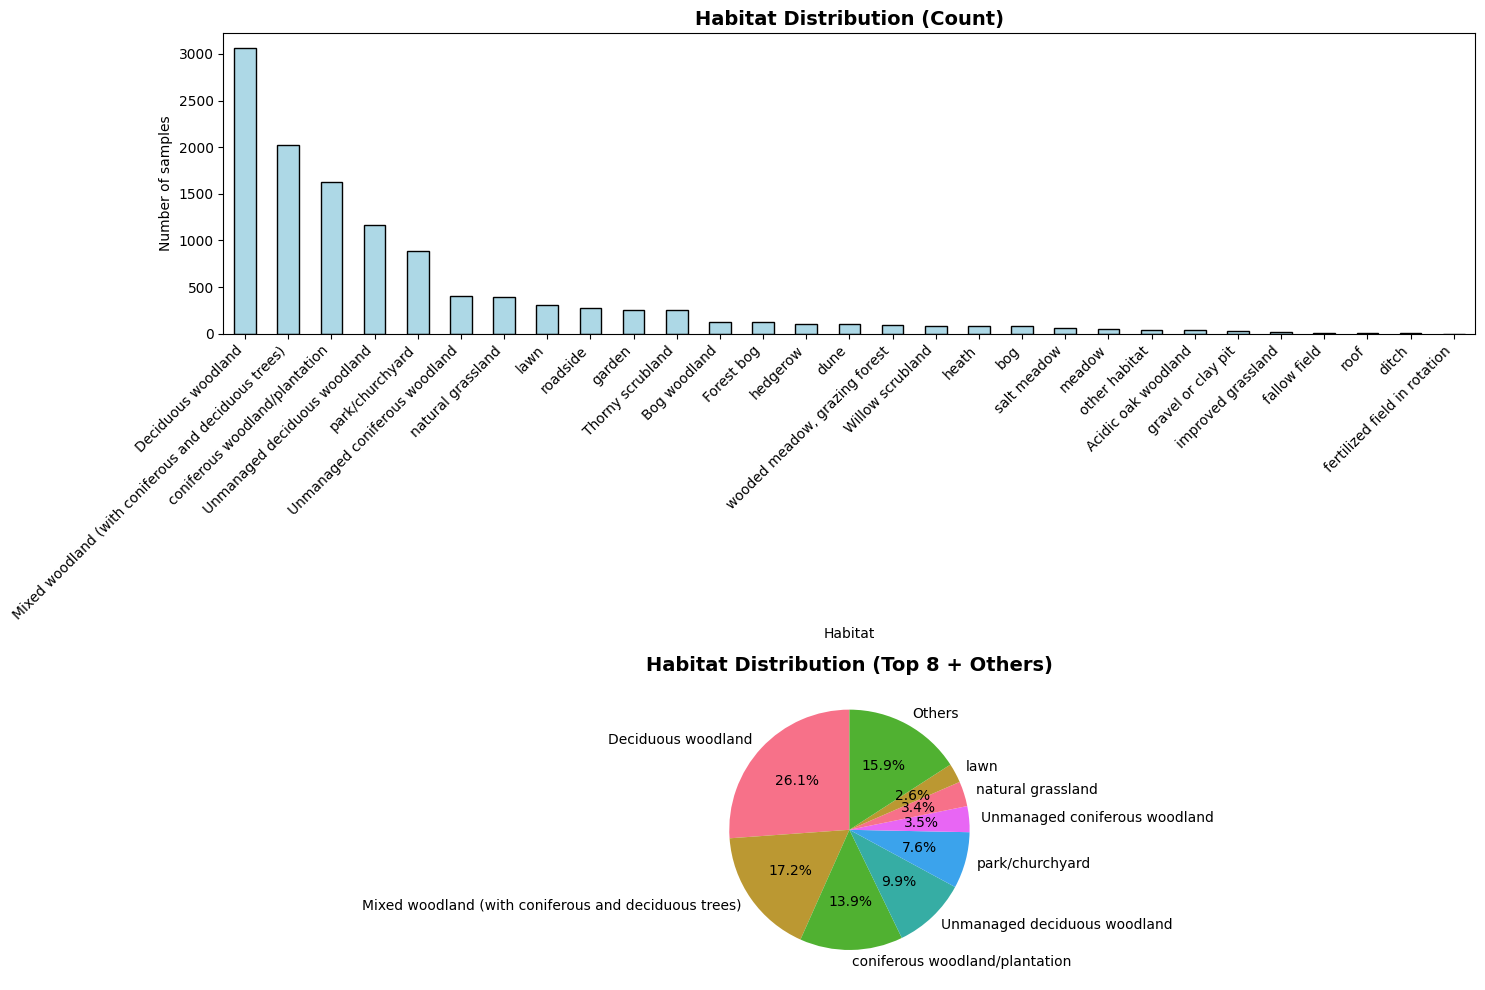


Habitat Statistics:
- Most common habitat: Deciduous woodland (3067 samples, 26.1%)
- Least common habitat: fertilized field in rotation (2 samples, 0.0%)
- Missing habitat values: 24277


In [34]:
# 3. HABITAT FEATURE ANALYSIS
print("\n3. HABITAT FEATURE ANALYSIS")
print("-" * 40)

# Unique habitats
habitats = df_metadata['Habitat'].dropna()
unique_habitats = habitats.unique()
print(f"Number of unique habitats: {len(unique_habitats)}")
print("\nUnique habitat types:")
for i, habitat in enumerate(sorted(unique_habitats), 1):
    print(f"{i}. {habitat}")

# Frequency distribution
habitat_counts = df_metadata['Habitat'].value_counts()
print(f"\nHabitat frequency distribution:")
print(habitat_counts)

# Visualize habitat distribution if plotting is available
if PLOTTING_AVAILABLE:
    plt.figure(figsize=(15, 10))

    # Bar plot
    plt.subplot(2, 1, 1)
    habitat_counts.plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title('Habitat Distribution (Count)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45, ha='right')

    # Pie chart for top habitats
    plt.subplot(2, 1, 2)
    top_habitats = habitat_counts.head(8)
    other_count = habitat_counts.iloc[8:].sum()
    if other_count > 0:
        plot_data = pd.concat([top_habitats, pd.Series([other_count], index=['Others'])])
    else:
        plot_data = top_habitats

    plt.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
    plt.title('Habitat Distribution (Top 8 + Others)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\nVisualization skipped (matplotlib not available)")

# Statistics
print(f"\nHabitat Statistics:")
print(f"- Most common habitat: {habitat_counts.index[0]} ({habitat_counts.iloc[0]} samples, {habitat_counts.iloc[0]/len(habitats)*100:.1f}%)")
print(f"- Least common habitat: {habitat_counts.index[-1]} ({habitat_counts.iloc[-1]} samples, {habitat_counts.iloc[-1]/len(habitats)*100:.1f}%)")
print(f"- Missing habitat values: {df_metadata['Habitat'].isnull().sum()}")


4. SUBSTRATE FEATURE ANALYSIS
----------------------------------------
Number of unique substrates: 22

Unique substrate types:
1. bark
2. bark of living trees
3. catkins
4. cones
5. dead stems of herbs, grass etc
6. dead wood (including bark)
7. faeces
8. fire spot
9. fruits
10. fungi
11. leaf or needle litter
12. liverworts
13. living leaves
14. living stems of herbs, grass etc
15. mosses
16. other substrate
17. peat mosses
18. soil
19. stems of herbs, grass etc
20. wood
21. wood and roots of living trees
22. wood chips or mulch

Substrate frequency distribution:
Substrate
soil                                8533
dead wood (including bark)           977
leaf or needle litter                943
wood                                 412
stems of herbs, grass etc            119
bark of living trees                 111
mosses                               103
bark                                  84
wood and roots of living trees        70
wood chips or mulch                   62
dead st

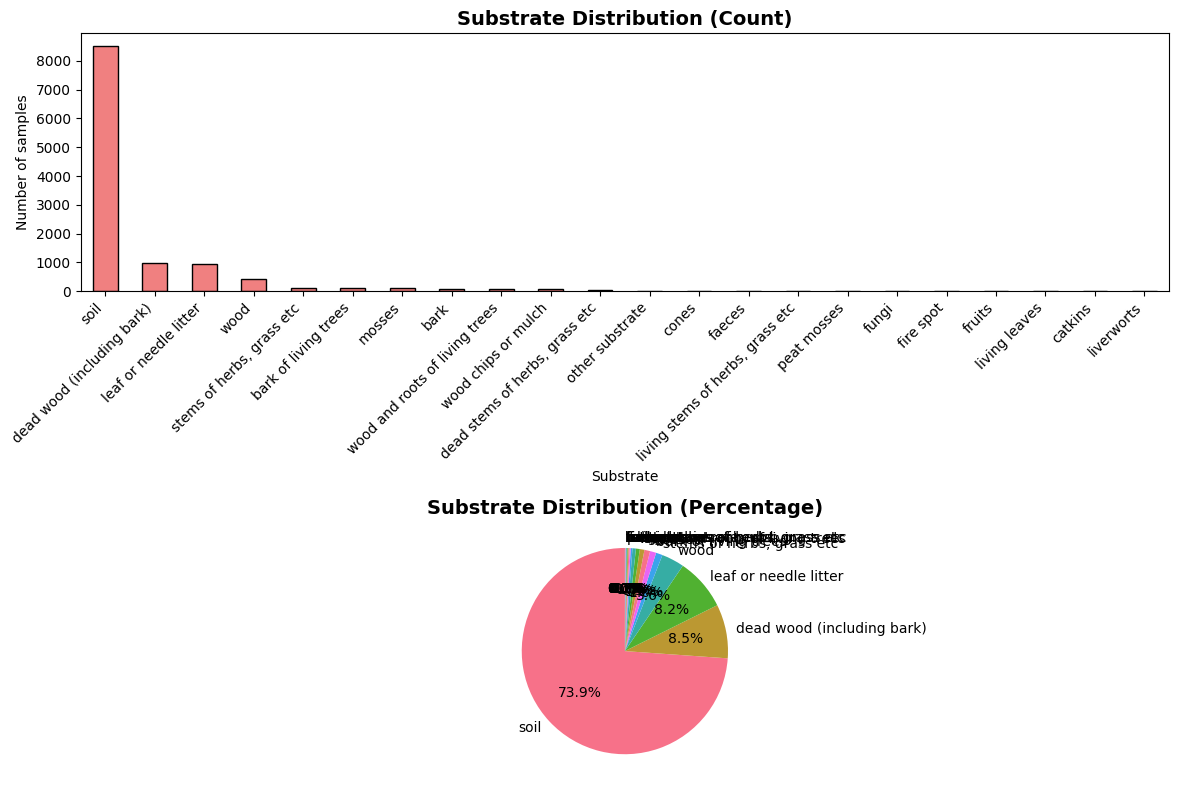


Substrate Statistics:
- Most common substrate: soil (8533 samples, 73.9%)
- Least common substrate: liverworts (1 samples, 0.0%)
- Missing substrate values: 24465


In [35]:
# 4. SUBSTRATE FEATURE ANALYSIS
print("\n4. SUBSTRATE FEATURE ANALYSIS")
print("-" * 40)

# Unique substrates
substrates = df_metadata['Substrate'].dropna()
unique_substrates = substrates.unique()
print(f"Number of unique substrates: {len(unique_substrates)}")
print("\nUnique substrate types:")
for i, substrate in enumerate(sorted(unique_substrates), 1):
    print(f"{i}. {substrate}")

# Frequency distribution
substrate_counts = df_metadata['Substrate'].value_counts()
print(f"\nSubstrate frequency distribution:")
print(substrate_counts)

# Visualize substrate distribution if plotting is available
if PLOTTING_AVAILABLE:
    plt.figure(figsize=(12, 8))

    # Bar plot
    plt.subplot(2, 1, 1)
    substrate_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Substrate Distribution (Count)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45, ha='right')

    # Pie chart
    plt.subplot(2, 1, 2)
    plt.pie(substrate_counts.values, labels=substrate_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Substrate Distribution (Percentage)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("\nVisualization skipped (matplotlib not available)")

# Statistics
print(f"\nSubstrate Statistics:")
print(f"- Most common substrate: {substrate_counts.index[0]} ({substrate_counts.iloc[0]} samples, {substrate_counts.iloc[0]/len(substrates)*100:.1f}%)")
print(f"- Least common substrate: {substrate_counts.index[-1]} ({substrate_counts.iloc[-1]} samples, {substrate_counts.iloc[-1]/len(substrates)*100:.1f}%)")
print(f"- Missing substrate values: {df_metadata['Substrate'].isnull().sum()}")


5. GEOGRAPHIC FEATURES ANALYSIS
----------------------------------------
Samples with geographic data: 10188/36015 (28.3%)

Latitude Statistics:
count    10776.000000
mean        55.824292
std          0.579731
min         54.560940
25%         55.492623
50%         55.812398
75%         56.092319
max         57.739133
Name: Latitude, dtype: float64

Longitude Statistics:
count    10825.000000
mean        11.051985
std          1.414240
min          8.080420
25%          9.825275
50%         11.392114
75%         12.292100
max         15.144060
Name: Longitude, dtype: float64


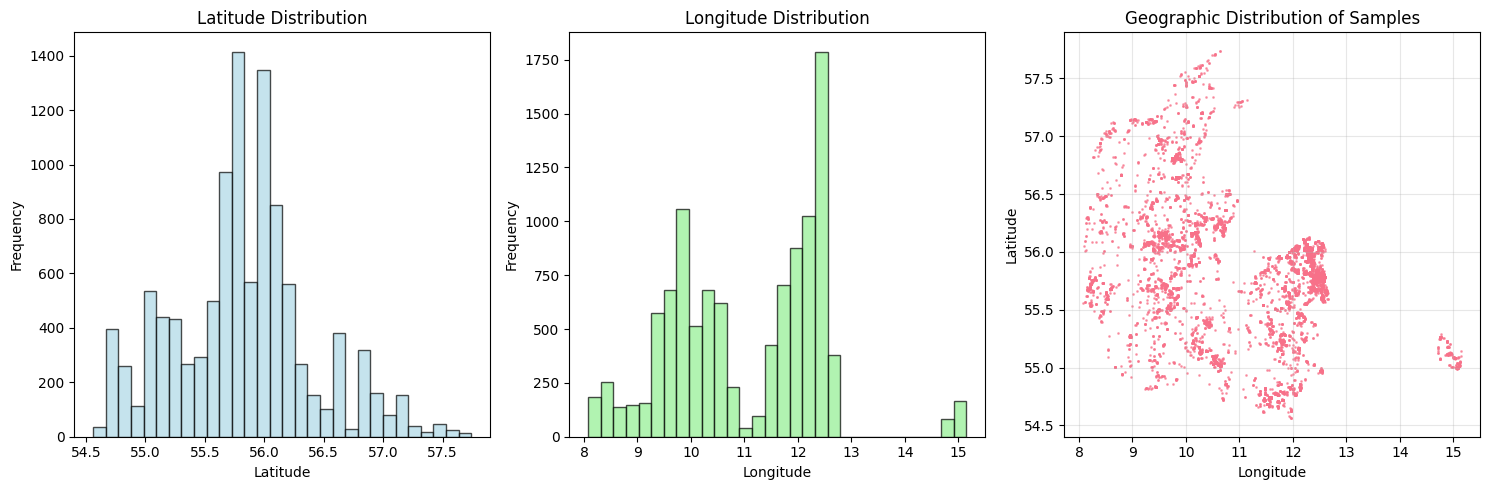


Geographic Ranges:
- Latitude range: 54.5609 to 57.7391
- Longitude range: 8.0804 to 15.1441
- Missing latitude values: 25239
- Missing longitude values: 25190


In [36]:
# 5. GEOGRAPHIC FEATURES ANALYSIS (Latitude & Longitude)
print("\n5. GEOGRAPHIC FEATURES ANALYSIS")
print("-" * 40)

# Remove missing values for geographic analysis
geo_data = df_metadata[['Latitude', 'Longitude']].dropna()
print(f"Samples with geographic data: {len(geo_data)}/{len(df_metadata)} ({len(geo_data)/len(df_metadata)*100:.1f}%)")

if len(geo_data) > 0:
    # Basic statistics
    print("\nLatitude Statistics:")
    print(df_metadata['Latitude'].describe())
    
    print("\nLongitude Statistics:")
    print(df_metadata['Longitude'].describe())
    
    # Visualize geographic distribution if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(15, 5))
        
        # Latitude distribution
        plt.subplot(1, 3, 1)
        plt.hist(df_metadata['Latitude'].dropna(), bins=30, color='lightblue', edgecolor='black', alpha=0.7)
        plt.title('Latitude Distribution')
        plt.xlabel('Latitude')
        plt.ylabel('Frequency')
        
        # Longitude distribution
        plt.subplot(1, 3, 2)
        plt.hist(df_metadata['Longitude'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        plt.title('Longitude Distribution')
        plt.xlabel('Longitude')
        plt.ylabel('Frequency')
        
        # Geographic scatter plot
        plt.subplot(1, 3, 3)
        plt.scatter(geo_data['Longitude'], geo_data['Latitude'], alpha=0.6, s=1)
        plt.title('Geographic Distribution of Samples')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")
    
    # Geographic ranges
    print(f"\nGeographic Ranges:")
    print(f"- Latitude range: {geo_data['Latitude'].min():.4f} to {geo_data['Latitude'].max():.4f}")
    print(f"- Longitude range: {geo_data['Longitude'].min():.4f} to {geo_data['Longitude'].max():.4f}")
    print(f"- Missing latitude values: {df_metadata['Latitude'].isnull().sum()}")
    print(f"- Missing longitude values: {df_metadata['Longitude'].isnull().sum()}")
else:
    print("No geographic data available for analysis.")


6. TEMPORAL FEATURE ANALYSIS
----------------------------------------
Samples with date data: 11513/36015 (32.0%)

Temporal Range:
- Earliest date: 1977-10-21 00:00:00
- Latest date: 2020-12-13 00:00:00
- Date span: 15759 days

Yearly distribution:
year
1977.0       1
1985.0       2
1986.0       9
1990.0       4
1991.0       3
1992.0       1
1998.0       3
1999.0       2
2000.0       4
2001.0       5
2002.0       1
2003.0       8
2004.0       2
2005.0       3
2006.0       6
2007.0       3
2008.0      13
2009.0     416
2010.0     387
2011.0     456
2012.0     547
2013.0     602
2014.0     266
2015.0     263
2016.0     551
2017.0    1265
2018.0    1553
2019.0    2179
2020.0    2958
Name: count, dtype: int64


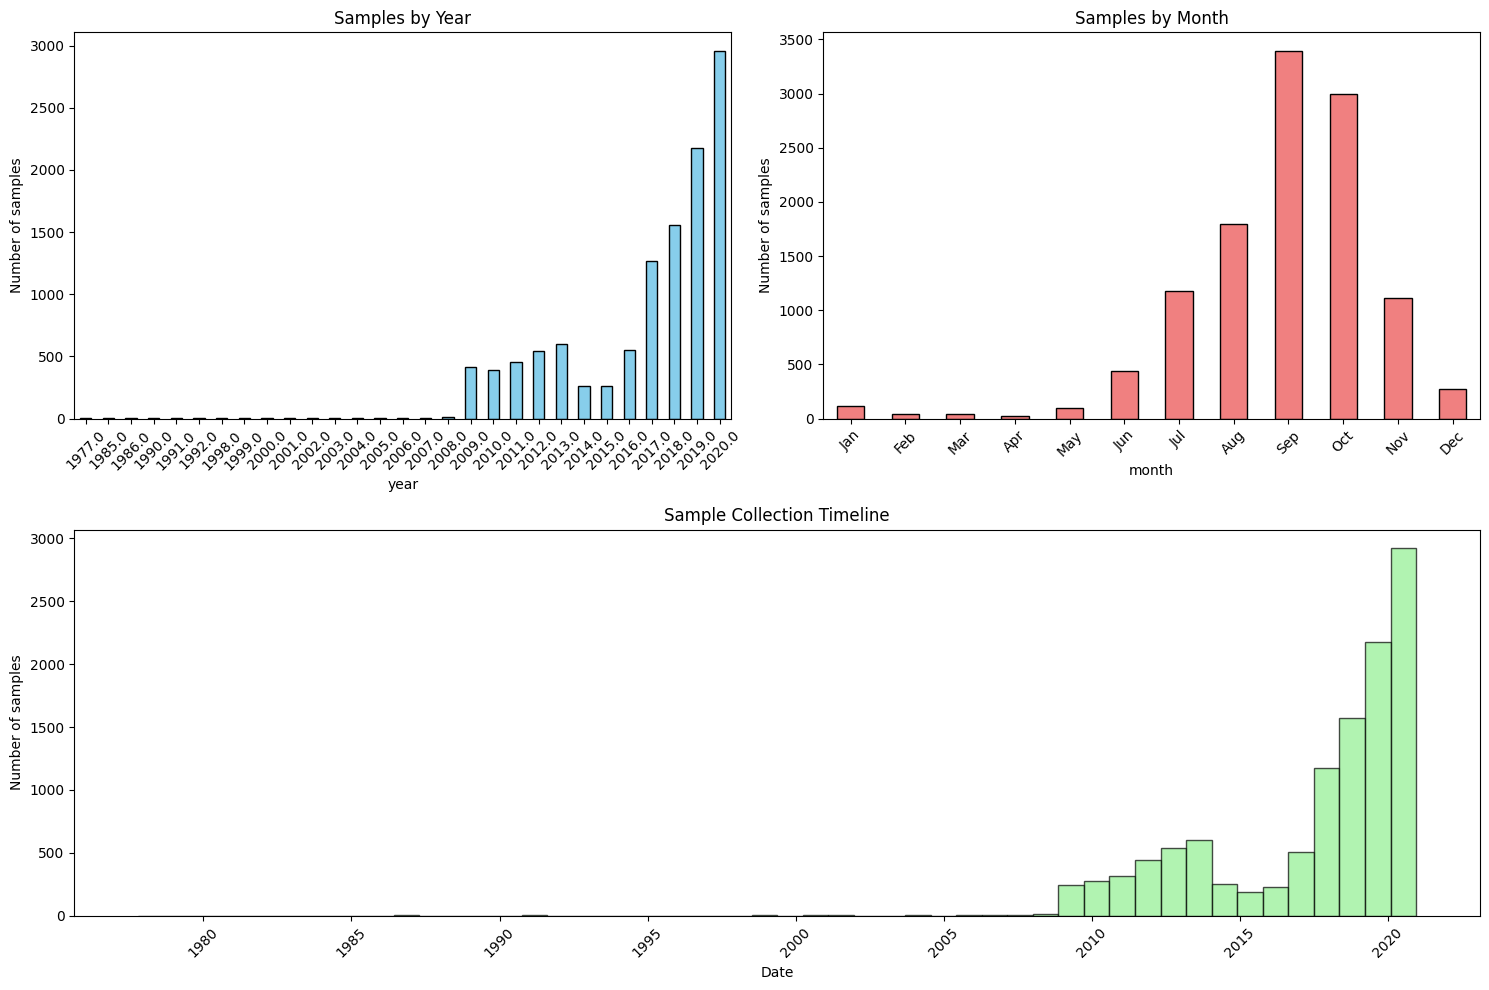


Seasonal patterns:
- Most active collection year: 2020.0 (2958 samples)
- Most active collection month: Sep (3396 samples)
- Missing date values: 24502


In [37]:
# 6. TEMPORAL FEATURE ANALYSIS (eventDate)
print("\n6. TEMPORAL FEATURE ANALYSIS")
print("-" * 40)

# Convert eventDate to datetime
df_metadata['eventDate_parsed'] = pd.to_datetime(df_metadata['eventDate'], errors='coerce')
date_data = df_metadata['eventDate_parsed'].dropna()

print(f"Samples with date data: {len(date_data)}/{len(df_metadata)} ({len(date_data)/len(df_metadata)*100:.1f}%)")

if len(date_data) > 0:
    # Extract temporal components
    df_metadata['year'] = df_metadata['eventDate_parsed'].dt.year
    df_metadata['month'] = df_metadata['eventDate_parsed'].dt.month
    df_metadata['day_of_year'] = df_metadata['eventDate_parsed'].dt.dayofyear
    
    # Basic temporal statistics
    print(f"\nTemporal Range:")
    print(f"- Earliest date: {date_data.min()}")
    print(f"- Latest date: {date_data.max()}")
    print(f"- Date span: {(date_data.max() - date_data.min()).days} days")
    
    # Yearly distribution
    yearly_counts = df_metadata['year'].value_counts().sort_index()
    print(f"\nYearly distribution:")
    print(yearly_counts)
    
    # Monthly distribution
    monthly_counts = df_metadata['month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Visualize temporal patterns if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(15, 10))
        
        # Yearly trend
        plt.subplot(2, 2, 1)
        yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Samples by Year')
        plt.ylabel('Number of samples')
        plt.xticks(rotation=45)
        
        # Monthly pattern
        plt.subplot(2, 2, 2)
        monthly_counts.reindex(range(1, 13), fill_value=0).plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title('Samples by Month')
        plt.ylabel('Number of samples')
        plt.xticks(range(12), month_names, rotation=45)
        
        # Timeline
        plt.subplot(2, 1, 2)
        plt.hist(date_data, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
        plt.title('Sample Collection Timeline')
        plt.xlabel('Date')
        plt.ylabel('Number of samples')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")
    
    print(f"\nSeasonal patterns:")
    print(f"- Most active collection year: {yearly_counts.idxmax()} ({yearly_counts.max()} samples)")
    # Fix the month index error
    most_active_month_idx = int(monthly_counts.idxmax()) - 1
    print(f"- Most active collection month: {month_names[most_active_month_idx]} ({monthly_counts.max()} samples)")
    print(f"- Missing date values: {df_metadata['eventDate'].isnull().sum()}")
else:
    print("No temporal data available for analysis.")


7. TARGET LABELS ANALYSIS
----------------------------------------
Samples with labels: 25863/36015 (71.8%)
Number of unique classes: 183
Class ID range: 0.0 to 182.0

Class distribution statistics:
- Mean samples per class: 141.33
- Median samples per class: 96.00
- Min samples per class: 13
- Max samples per class: 875

Most common classes:
taxonID_index
0.0    404
1.0    268
2.0    187
3.0    623
4.0    193
5.0    671
6.0    266
7.0    132
8.0     68
9.0    424
Name: count, dtype: int64

Least common classes:
taxonID_index
173.0    40
174.0    40
175.0    28
176.0    51
177.0    40
178.0    30
179.0    29
180.0    55
181.0    27
182.0    32
Name: count, dtype: int64


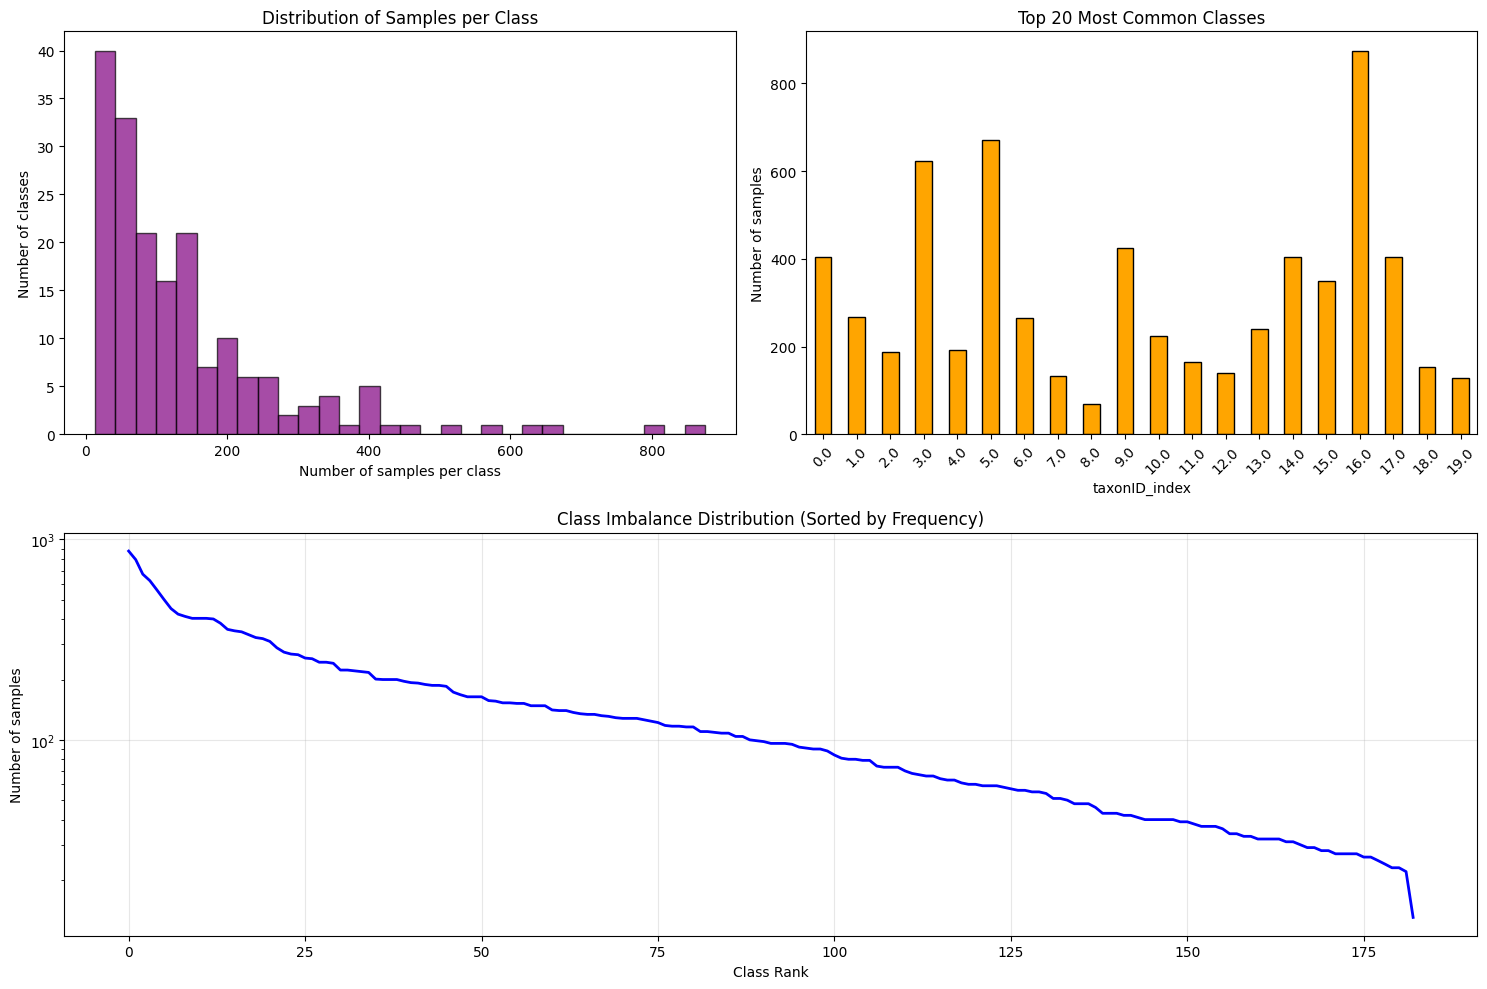


Class imbalance metrics:
- Imbalance ratio (max/min): 67.31
- Classes with only 1 sample: 0
- Classes with >100 samples: 88

Label availability by dataset split:
- final: 0/3600 (0.0%) have labels
- test: 0/6552 (0.0%) have labels
- train: 25863/25863 (100.0%) have labels


In [38]:
# 7. TARGET LABELS ANALYSIS (taxonID_index)
print("\n7. TARGET LABELS ANALYSIS")
print("-" * 40)

# Analyze target labels
labels_data = df_metadata['taxonID_index'].dropna()
print(f"Samples with labels: {len(labels_data)}/{len(df_metadata)} ({len(labels_data)/len(df_metadata)*100:.1f}%)")

if len(labels_data) > 0:
    # Unique classes
    unique_classes = labels_data.unique()
    print(f"Number of unique classes: {len(unique_classes)}")
    print(f"Class ID range: {labels_data.min()} to {labels_data.max()}")
    
    # Class distribution
    class_counts = labels_data.value_counts().sort_index()
    print(f"\nClass distribution statistics:")
    print(f"- Mean samples per class: {class_counts.mean():.2f}")
    print(f"- Median samples per class: {class_counts.median():.2f}")
    print(f"- Min samples per class: {class_counts.min()}")
    print(f"- Max samples per class: {class_counts.max()}")
    
    # Most and least common classes
    print(f"\nMost common classes:")
    print(class_counts.head(10))
    print(f"\nLeast common classes:")
    print(class_counts.tail(10))
    
    # Visualize class distribution if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(15, 10))
        
        # Class frequency histogram
        plt.subplot(2, 2, 1)
        plt.hist(class_counts.values, bins=30, color='purple', alpha=0.7, edgecolor='black')
        plt.title('Distribution of Samples per Class')
        plt.xlabel('Number of samples per class')
        plt.ylabel('Number of classes')
        
        # Top 20 classes
        plt.subplot(2, 2, 2)
        class_counts.head(20).plot(kind='bar', color='orange', edgecolor='black')
        plt.title('Top 20 Most Common Classes')
        plt.ylabel('Number of samples')
        plt.xticks(rotation=45)
        
        # Class imbalance analysis
        plt.subplot(2, 1, 2)
        sorted_counts = class_counts.sort_values(ascending=False)
        plt.plot(range(len(sorted_counts)), sorted_counts.values, 'b-', linewidth=2)
        plt.title('Class Imbalance Distribution (Sorted by Frequency)')
        plt.xlabel('Class Rank')
        plt.ylabel('Number of samples')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")
    
    # Imbalance metrics
    max_count = class_counts.max()
    min_count = class_counts.min()
    imbalance_ratio = max_count / min_count
    print(f"\nClass imbalance metrics:")
    print(f"- Imbalance ratio (max/min): {imbalance_ratio:.2f}")
    print(f"- Classes with only 1 sample: {(class_counts == 1).sum()}")
    print(f"- Classes with >100 samples: {(class_counts > 100).sum()}")
    
    # Label availability by dataset split
    print(f"\nLabel availability by dataset split:")
    for split in df_metadata['dataset_split'].unique():
        split_data = df_metadata[df_metadata['dataset_split'] == split]
        labeled = split_data['taxonID_index'].notna().sum()
        total = len(split_data)
        print(f"- {split}: {labeled}/{total} ({labeled/total*100:.1f}%) have labels")
else:
    print("No label data available for analysis.")

In [39]:
# 7.5. DETAILED ANALYSIS BY DATASET SPLIT
print("\n7.5. DETAILED ANALYSIS BY DATASET SPLIT")
print("=" * 50)

for split_name in ['train', 'test', 'final']:
    print(f"\n{split_name.upper()} SET ANALYSIS")
    print("-" * 40)
    
    # Filter data for this split
    split_data = df_metadata[df_metadata['dataset_split'] == split_name].copy()
    print(f"Total samples: {len(split_data):,}")
    
    if len(split_data) == 0:
        print("No data available for this split.")
        continue
    
    # Basic statistics
    print(f"\nFeature completeness in {split_name} set:")
    for col in ['Habitat', 'Substrate', 'Latitude', 'Longitude', 'eventDate', 'taxonID_index']:
        if col in split_data.columns:
            non_null = split_data[col].notna().sum()
            total = len(split_data)
            percentage = (non_null / total) * 100
            print(f"  - {col}: {non_null:,}/{total:,} ({percentage:.1f}%)")
    
    # Habitat analysis for this split
    if split_data['Habitat'].notna().sum() > 0:
        habitat_counts_split = split_data['Habitat'].value_counts()
        print(f"\nTop 5 habitats in {split_name} set:")
        print(habitat_counts_split.head())
        print(f"  - Unique habitats: {split_data['Habitat'].nunique()}")
    
    # Substrate analysis for this split
    if split_data['Substrate'].notna().sum() > 0:
        substrate_counts_split = split_data['Substrate'].value_counts()
        print(f"\nTop 5 substrates in {split_name} set:")
        print(substrate_counts_split.head())
        print(f"  - Unique substrates: {split_data['Substrate'].nunique()}")
    
    # Geographic analysis for this split
    geo_split = split_data[['Latitude', 'Longitude']].dropna()
    if len(geo_split) > 0:
        print(f"\nGeographic distribution in {split_name} set:")
        print(f"  - Samples with coordinates: {len(geo_split):,}")
        print(f"  - Latitude range: {geo_split['Latitude'].min():.4f} to {geo_split['Latitude'].max():.4f}")
        print(f"  - Longitude range: {geo_split['Longitude'].min():.4f} to {geo_split['Longitude'].max():.4f}")
    
    # Temporal analysis for this split
    if split_data['eventDate_parsed'].notna().sum() > 0:
        date_split = split_data['eventDate_parsed'].dropna()
        print(f"\nTemporal distribution in {split_name} set:")
        print(f"  - Samples with dates: {len(date_split):,}")
        print(f"  - Date range: {date_split.min().strftime('%Y-%m-%d')} to {date_split.max().strftime('%Y-%m-%d')}")
        
        # Year distribution for this split
        if 'year' in split_data.columns:
            year_split = split_data['year'].dropna().value_counts().sort_index()
            if len(year_split) > 0:
                print(f"  - Most active year: {year_split.idxmax()} ({year_split.max()} samples)")
    
    # Class distribution for train set
    if split_name == 'train' and split_data['taxonID_index'].notna().sum() > 0:
        labels_split = split_data['taxonID_index'].dropna()
        class_counts_split = labels_split.value_counts()
        print(f"\nClass distribution in {split_name} set:")
        print(f"  - Unique classes: {len(class_counts_split)}")
        print(f"  - Samples per class - Mean: {class_counts_split.mean():.1f}, Median: {class_counts_split.median():.1f}")
        print(f"  - Class imbalance ratio: {class_counts_split.max() / class_counts_split.min():.1f}")
        print(f"  - Top 5 classes: {list(class_counts_split.head().index)}")
    
    print("-" * 40)


7.5. DETAILED ANALYSIS BY DATASET SPLIT

TRAIN SET ANALYSIS
----------------------------------------
Total samples: 25,863

Feature completeness in train set:
  - Habitat: 1,616/25,863 (6.2%)
  - Substrate: 1,441/25,863 (5.6%)
  - Latitude: 624/25,863 (2.4%)
  - Longitude: 673/25,863 (2.6%)
  - eventDate: 1,361/25,863 (5.3%)
  - taxonID_index: 25,863/25,863 (100.0%)

Top 5 habitats in train set:
Habitat
Deciduous woodland                                      407
Mixed woodland (with coniferous and deciduous trees)    259
coniferous woodland/plantation                          207
park/churchyard                                         152
Unmanaged deciduous woodland                            145
Name: count, dtype: int64
  - Unique habitats: 28

Top 5 substrates in train set:
Substrate
soil                          1089
leaf or needle litter          135
dead wood (including bark)      92
wood                            45
stems of herbs, grass etc       18
Name: count, dtype: int64


7.6. COMPARATIVE VISUALIZATIONS BY DATASET SPLIT
Creating feature completeness comparison...
Creating habitat distribution comparison...
Creating substrate distribution comparison...


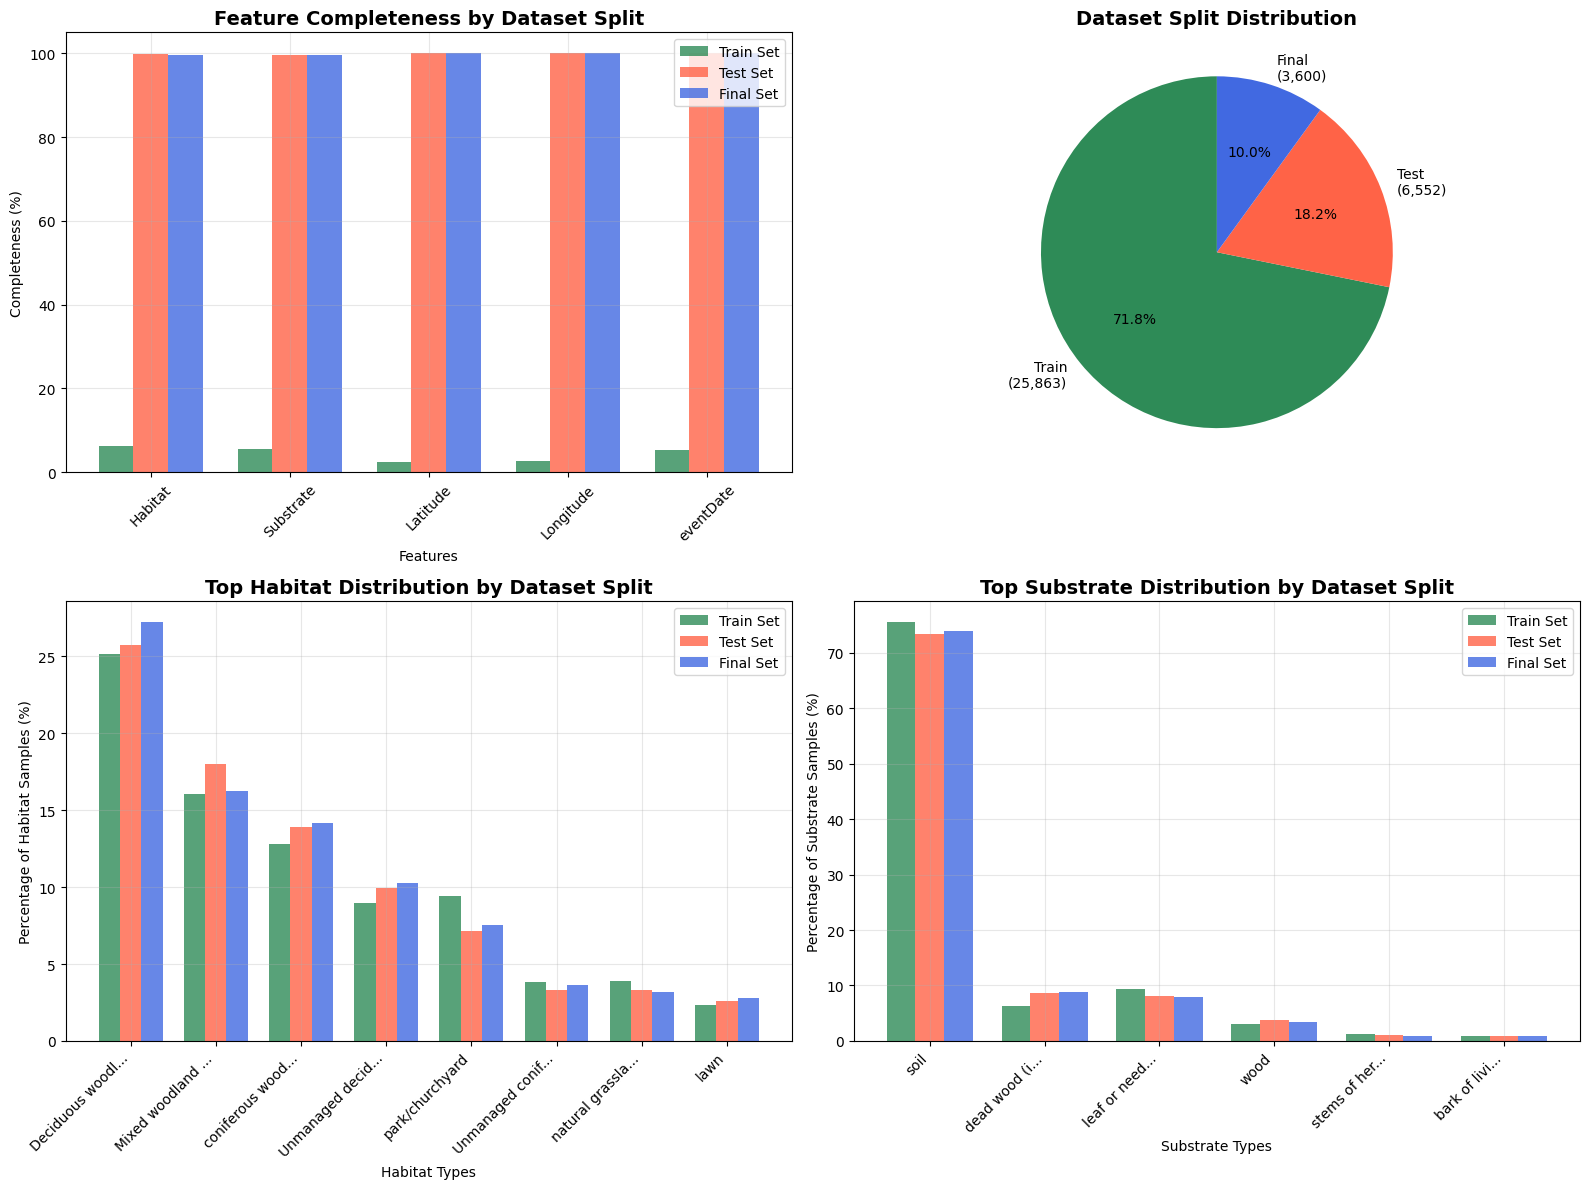

Creating temporal distribution comparison...


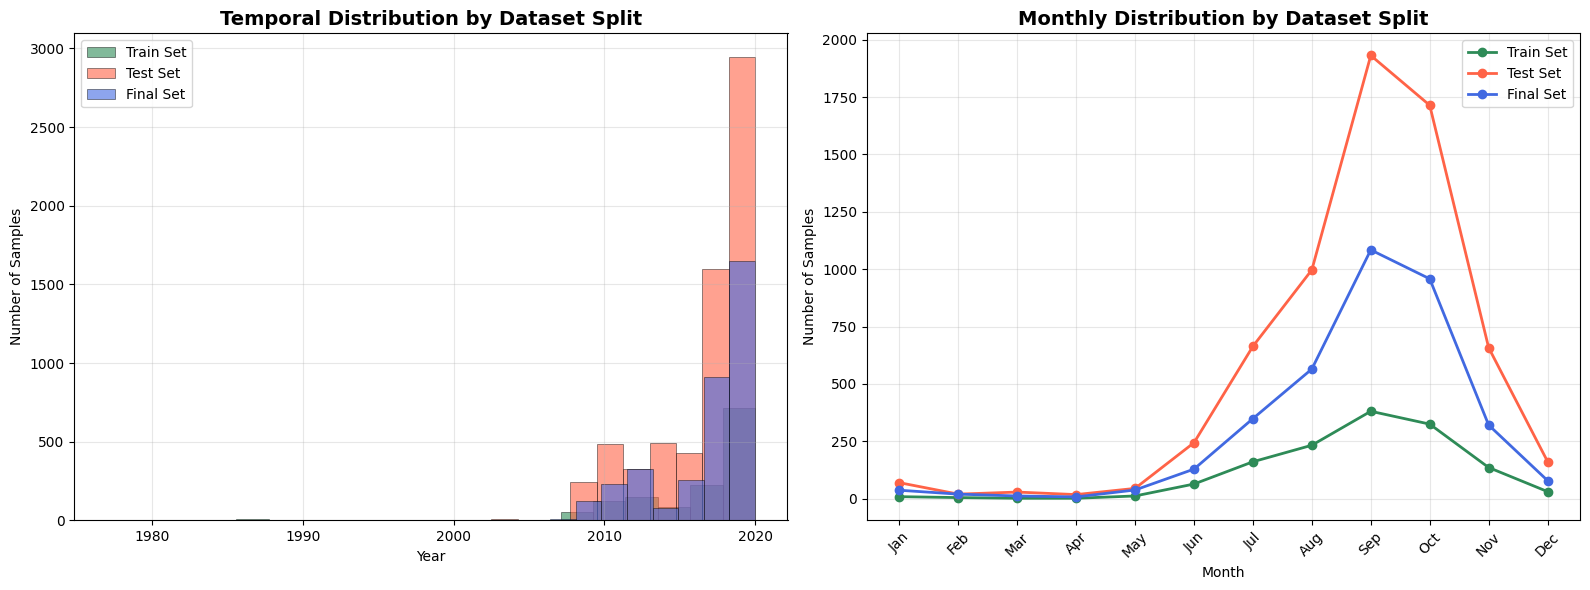

Creating geographic distribution comparison...


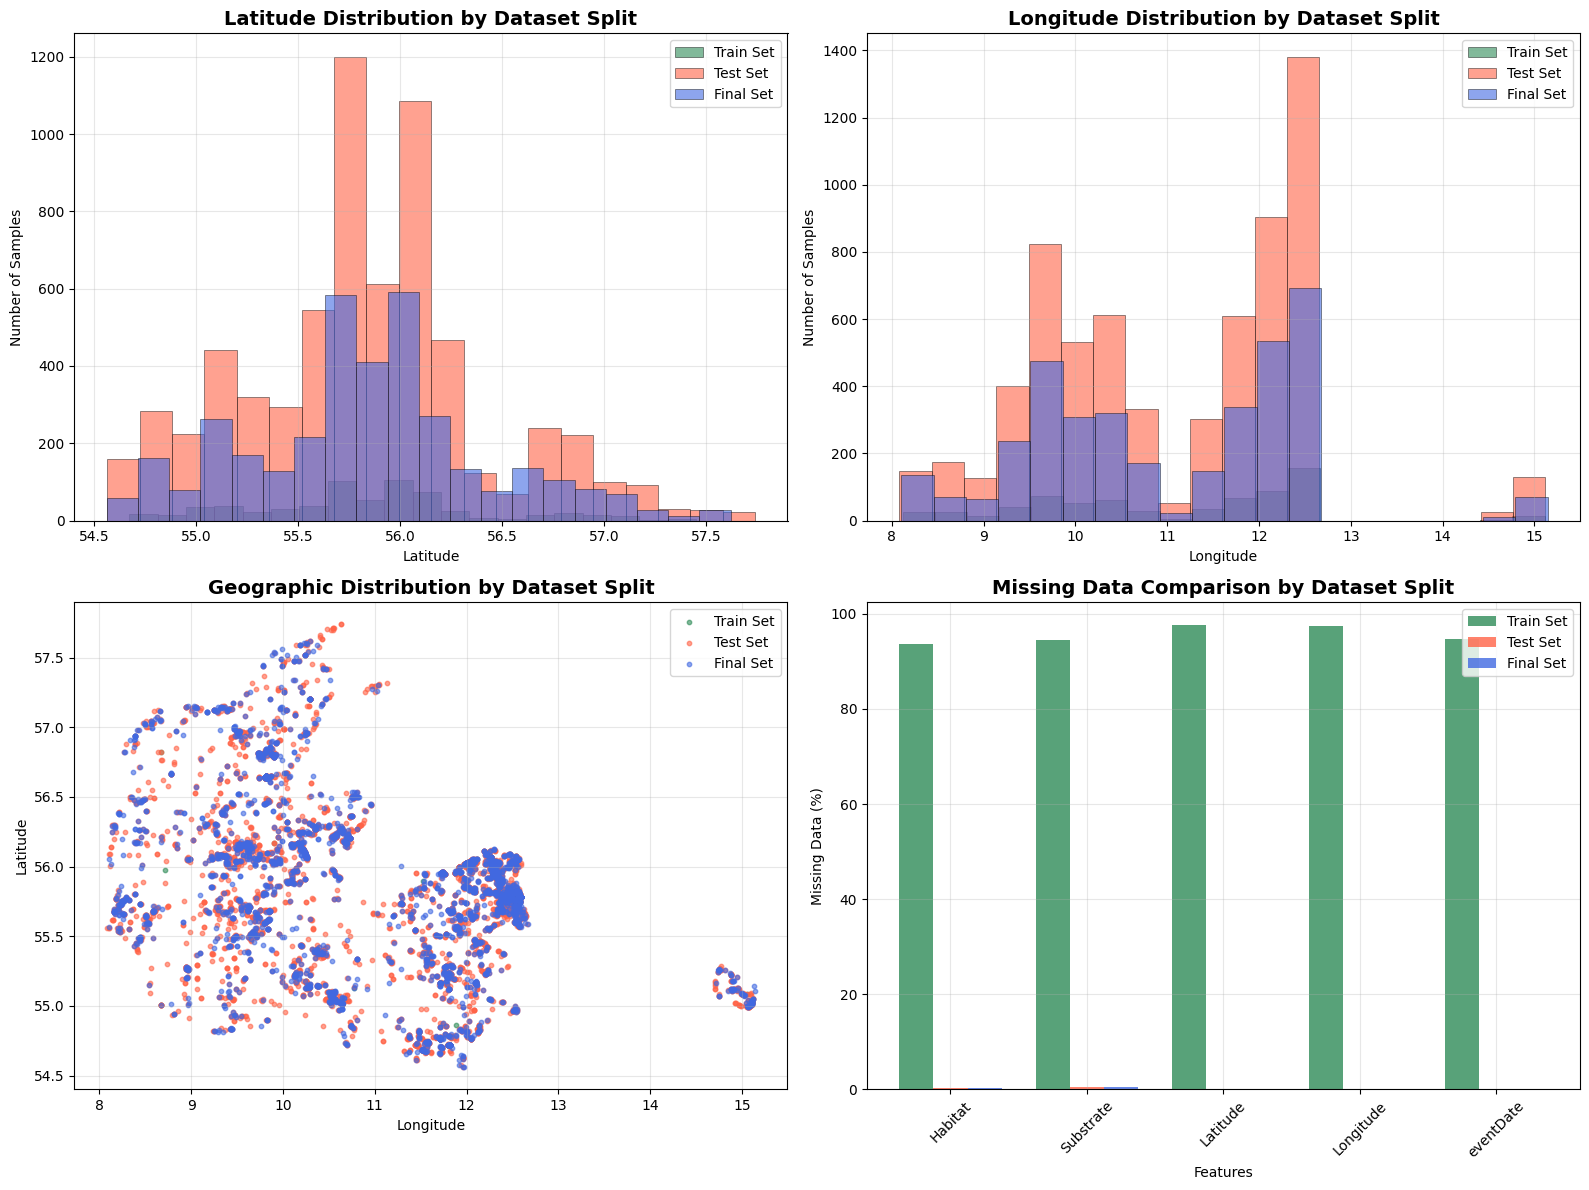

Creating summary statistics table...

SUMMARY STATISTICS BY DATASET SPLIT
Split Total Samples Habitat Complete Substrate Complete Geographic Complete Temporal Complete
Train        25,863     1,616 (6.2%)       1,441 (5.6%)           36 (0.1%)      1,361 (5.3%)
 Test         6,552    6,535 (99.7%)      6,525 (99.6%)      6,552 (100.0%)    6,552 (100.0%)
Final         3,600    3,587 (99.6%)      3,584 (99.6%)      3,600 (100.0%)    3,600 (100.0%)


In [40]:
# 7.6. COMPARATIVE VISUALIZATIONS BY DATASET SPLIT
print("\n7.6. COMPARATIVE VISUALIZATIONS BY DATASET SPLIT")
print("=" * 50)

if PLOTTING_AVAILABLE:
    # Create comparison plots for different splits
    splits = ['train', 'test', 'final']
    split_colors = ['#2E8B57', '#FF6347', '#4169E1']  # SeaGreen, Tomato, RoyalBlue
    
    # 1. FEATURE COMPLETENESS COMPARISON
    print("Creating feature completeness comparison...")
    
    # Calculate completeness for each split
    features_to_analyze = ['Habitat', 'Substrate', 'Latitude', 'Longitude', 'eventDate']
    completeness_data = []
    
    for split in splits:
        split_data = df_metadata[df_metadata['dataset_split'] == split]
        split_completeness = []
        for feature in features_to_analyze:
            completeness = (split_data[feature].notna().sum() / len(split_data)) * 100
            split_completeness.append(completeness)
        completeness_data.append(split_completeness)
    
    # Create completeness comparison plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Feature completeness bar chart
    x_pos = np.arange(len(features_to_analyze))
    width = 0.25
    
    for i, (split, data, color) in enumerate(zip(splits, completeness_data, split_colors)):
        ax1.bar(x_pos + i*width, data, width, label=f'{split.title()} Set', color=color, alpha=0.8)
    
    ax1.set_xlabel('Features')
    ax1.set_ylabel('Completeness (%)')
    ax1.set_title('Feature Completeness by Dataset Split', fontweight='bold', fontsize=14)
    ax1.set_xticks(x_pos + width)
    ax1.set_xticklabels(features_to_analyze, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. SAMPLE SIZE COMPARISON
    split_sizes = [len(df_metadata[df_metadata['dataset_split'] == split]) for split in splits]
    
    # Pie chart for split distribution
    ax2.pie(split_sizes, labels=[f'{split.title()}\n({size:,})' for split, size in zip(splits, split_sizes)], 
            autopct='%1.1f%%', colors=split_colors, startangle=90)
    ax2.set_title('Dataset Split Distribution', fontweight='bold', fontsize=14)
    
    # 3. HABITAT DISTRIBUTION BY SPLIT
    print("Creating habitat distribution comparison...")
    
    # Get top 8 habitats overall for consistent comparison
    top_habitats = df_metadata['Habitat'].value_counts().head(8).index
    
    habitat_split_data = []
    for split in splits:
        split_data = df_metadata[df_metadata['dataset_split'] == split]
        split_habitat_counts = split_data['Habitat'].value_counts()
        split_habitat_percentages = []
        for habitat in top_habitats:
            if habitat in split_habitat_counts.index:
                percentage = (split_habitat_counts[habitat] / split_data['Habitat'].notna().sum()) * 100
            else:
                percentage = 0
            split_habitat_percentages.append(percentage)
        habitat_split_data.append(split_habitat_percentages)
    
    x_pos = np.arange(len(top_habitats))
    for i, (split, data, color) in enumerate(zip(splits, habitat_split_data, split_colors)):
        ax3.bar(x_pos + i*width, data, width, label=f'{split.title()} Set', color=color, alpha=0.8)
    
    ax3.set_xlabel('Habitat Types')
    ax3.set_ylabel('Percentage of Habitat Samples (%)')
    ax3.set_title('Top Habitat Distribution by Dataset Split', fontweight='bold', fontsize=14)
    ax3.set_xticks(x_pos + width)
    ax3.set_xticklabels([h[:15] + '...' if len(h) > 15 else h for h in top_habitats], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. SUBSTRATE DISTRIBUTION BY SPLIT
    print("Creating substrate distribution comparison...")
    
    # Get top 6 substrates overall for consistent comparison
    top_substrates = df_metadata['Substrate'].value_counts().head(6).index
    
    substrate_split_data = []
    for split in splits:
        split_data = df_metadata[df_metadata['dataset_split'] == split]
        split_substrate_counts = split_data['Substrate'].value_counts()
        split_substrate_percentages = []
        for substrate in top_substrates:
            if substrate in split_substrate_counts.index:
                percentage = (split_substrate_counts[substrate] / split_data['Substrate'].notna().sum()) * 100
            else:
                percentage = 0
            split_substrate_percentages.append(percentage)
        substrate_split_data.append(split_substrate_percentages)
    
    x_pos = np.arange(len(top_substrates))
    for i, (split, data, color) in enumerate(zip(splits, substrate_split_data, split_colors)):
        ax4.bar(x_pos + i*width, data, width, label=f'{split.title()} Set', color=color, alpha=0.8)
    
    ax4.set_xlabel('Substrate Types')
    ax4.set_ylabel('Percentage of Substrate Samples (%)')
    ax4.set_title('Top Substrate Distribution by Dataset Split', fontweight='bold', fontsize=14)
    ax4.set_xticks(x_pos + width)
    ax4.set_xticklabels([s[:12] + '...' if len(s) > 12 else s for s in top_substrates], rotation=45, ha='right')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 5. TEMPORAL DISTRIBUTION BY SPLIT
    print("Creating temporal distribution comparison...")
    
    if df_metadata['year'].notna().sum() > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Year distribution by split
        for i, (split, color) in enumerate(zip(splits, split_colors)):
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            year_data = split_data['year'].dropna()
            if len(year_data) > 0:
                ax1.hist(year_data, bins=20, alpha=0.6, label=f'{split.title()} Set', 
                        color=color, edgecolor='black', linewidth=0.5)
        
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Samples')
        ax1.set_title('Temporal Distribution by Dataset Split', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Monthly distribution by split
        for split, color in zip(splits, split_colors):
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            month_data = split_data['month'].dropna()
            if len(month_data) > 0:
                month_counts = month_data.value_counts().reindex(range(1, 13), fill_value=0)
                ax2.plot(range(1, 13), month_counts.values, marker='o', linewidth=2, 
                        label=f'{split.title()} Set', color=color, markersize=6)
        
        ax2.set_xlabel('Month')
        ax2.set_ylabel('Number of Samples')
        ax2.set_title('Monthly Distribution by Dataset Split', fontweight='bold', fontsize=14)
        ax2.set_xticks(range(1, 13))
        ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # 6. GEOGRAPHIC DISTRIBUTION BY SPLIT
    print("Creating geographic distribution comparison...")
    
    if df_metadata[['Latitude', 'Longitude']].notna().any().any():
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Latitude distribution by split
        for split, color in zip(splits, split_colors):
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            lat_data = split_data['Latitude'].dropna()
            if len(lat_data) > 0:
                ax1.hist(lat_data, bins=20, alpha=0.6, label=f'{split.title()} Set', 
                        color=color, edgecolor='black', linewidth=0.5)
        
        ax1.set_xlabel('Latitude')
        ax1.set_ylabel('Number of Samples')
        ax1.set_title('Latitude Distribution by Dataset Split', fontweight='bold', fontsize=14)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Longitude distribution by split
        for split, color in zip(splits, split_colors):
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            lon_data = split_data['Longitude'].dropna()
            if len(lon_data) > 0:
                ax2.hist(lon_data, bins=20, alpha=0.6, label=f'{split.title()} Set', 
                        color=color, edgecolor='black', linewidth=0.5)
        
        ax2.set_xlabel('Longitude')
        ax2.set_ylabel('Number of Samples')
        ax2.set_title('Longitude Distribution by Dataset Split', fontweight='bold', fontsize=14)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Geographic scatter plots by split
        for i, (split, color) in enumerate(zip(splits, split_colors)):
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            geo_split_data = split_data[['Latitude', 'Longitude']].dropna()
            if len(geo_split_data) > 0:
                if i == 0:  # First plot gets its own subplot
                    ax3.scatter(geo_split_data['Longitude'], geo_split_data['Latitude'], 
                              alpha=0.6, s=10, label=f'{split.title()} Set', color=color)
                    ax3.set_xlabel('Longitude')
                    ax3.set_ylabel('Latitude')
                    ax3.set_title('Geographic Distribution by Dataset Split', fontweight='bold', fontsize=14)
                    ax3.grid(True, alpha=0.3)
                else:
                    ax3.scatter(geo_split_data['Longitude'], geo_split_data['Latitude'], 
                              alpha=0.6, s=10, label=f'{split.title()} Set', color=color)
        
        ax3.legend()
        
        # Missing data comparison
        missing_data_comparison = []
        for split in splits:
            split_data = df_metadata[df_metadata['dataset_split'] == split]
            missing_percentages = []
            for feature in features_to_analyze:
                missing_pct = (split_data[feature].isna().sum() / len(split_data)) * 100
                missing_percentages.append(missing_pct)
            missing_data_comparison.append(missing_percentages)
        
        x_pos = np.arange(len(features_to_analyze))
        for i, (split, data, color) in enumerate(zip(splits, missing_data_comparison, split_colors)):
            ax4.bar(x_pos + i*width, data, width, label=f'{split.title()} Set', color=color, alpha=0.8)
        
        ax4.set_xlabel('Features')
        ax4.set_ylabel('Missing Data (%)')
        ax4.set_title('Missing Data Comparison by Dataset Split', fontweight='bold', fontsize=14)
        ax4.set_xticks(x_pos + width)
        ax4.set_xticklabels(features_to_analyze, rotation=45)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # 7. SUMMARY STATISTICS TABLE
    print("Creating summary statistics table...")
    
    summary_stats = []
    for split in splits:
        split_data = df_metadata[df_metadata['dataset_split'] == split]
        stats = {
            'Split': split.title(),
            'Total Samples': f"{len(split_data):,}",
            'Habitat Complete': f"{split_data['Habitat'].notna().sum():,} ({(split_data['Habitat'].notna().sum()/len(split_data)*100):.1f}%)",
            'Substrate Complete': f"{split_data['Substrate'].notna().sum():,} ({(split_data['Substrate'].notna().sum()/len(split_data)*100):.1f}%)",
            'Geographic Complete': f"{split_data[['Latitude', 'Longitude']].dropna().shape[0]:,} ({(split_data[['Latitude', 'Longitude']].dropna().shape[0]/len(split_data)*100):.1f}%)",
            'Temporal Complete': f"{split_data['eventDate'].notna().sum():,} ({(split_data['eventDate'].notna().sum()/len(split_data)*100):.1f}%)"
        }
        summary_stats.append(stats)
    
    summary_df = pd.DataFrame(summary_stats)
    print("\n" + "="*80)
    print("SUMMARY STATISTICS BY DATASET SPLIT")
    print("="*80)
    print(summary_df.to_string(index=False))
    print("="*80)

else:
    print("Plotting not available. Skipping visualizations.")


7.7. TRAINING SET CLASS DISTRIBUTION ANALYSIS
Training set label analysis:
- Total labeled samples: 25,863
- Number of classes: 183
- Class distribution range: 13 to 875 samples per class
- Mean samples per class: 141.3
- Median samples per class: 96.0
Training set label analysis:
- Total labeled samples: 25,863
- Number of classes: 183
- Class distribution range: 13 to 875 samples per class
- Mean samples per class: 141.3
- Median samples per class: 96.0


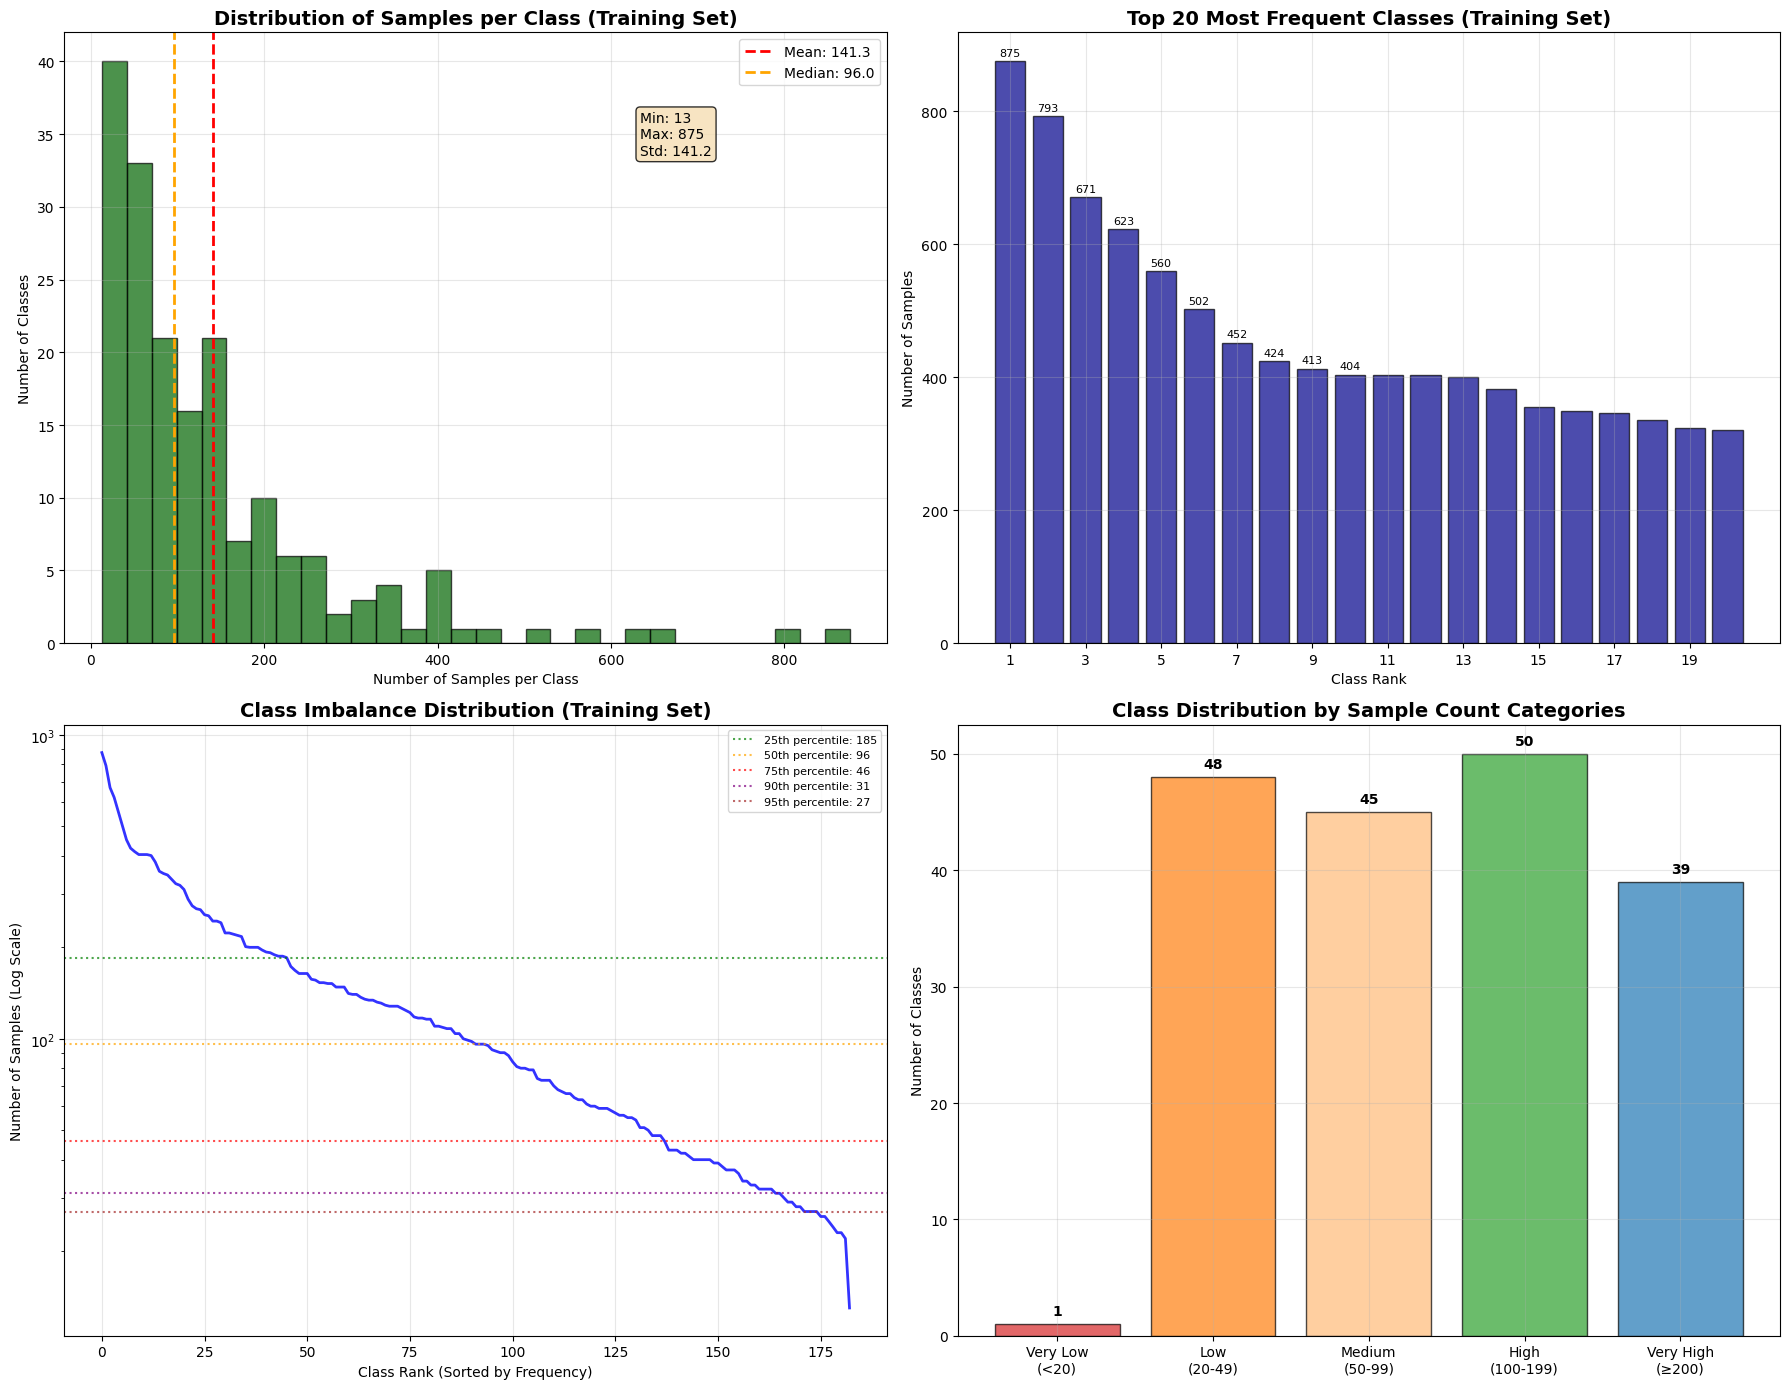


Class distribution insights:
- Very underrepresented classes (<20 samples): 1 classes (0.5%)
- Underrepresented classes (20-49 samples): 48 classes (26.2%)
- Moderately represented classes (50-99 samples): 45 classes (24.6%)
- Well represented classes (100-199 samples): 50 classes (27.3%)
- Highly represented classes (≥200 samples): 39 classes (21.3%)

Class distribution by habitat analysis:
- Classes appear across 28 different habitats
- Most diverse habitats (by number of classes):
  • Deciduous woodland: 116 classes
  • Mixed woodland (with coniferous and deciduous trees): 106 classes
  • coniferous woodland/plantation: 82 classes
  • Unmanaged deciduous woodland: 76 classes
  • park/churchyard: 72 classes

Class distribution by substrate analysis:
- Classes appear across 20 different substrates
- Most diverse substrates (by number of classes):
  • soil: 161 classes
  • leaf or needle litter: 57 classes
  • dead wood (including bark): 27 classes
  • wood: 22 classes
  • stems of he

In [41]:
# 7.7. TRAINING SET CLASS DISTRIBUTION ANALYSIS
print("\n7.7. TRAINING SET CLASS DISTRIBUTION ANALYSIS")
print("=" * 50)

if PLOTTING_AVAILABLE:
    # Focus on training set since it's the only one with labels
    train_data = df_metadata[df_metadata['dataset_split'] == 'train'].copy()
    train_labels = train_data['taxonID_index'].dropna()
    
    if len(train_labels) > 0:
        class_counts = train_labels.value_counts().sort_values(ascending=False)
        
        print(f"Training set label analysis:")
        print(f"- Total labeled samples: {len(train_labels):,}")
        print(f"- Number of classes: {len(class_counts)}")
        print(f"- Class distribution range: {class_counts.min()} to {class_counts.max()} samples per class")
        print(f"- Mean samples per class: {class_counts.mean():.1f}")
        print(f"- Median samples per class: {class_counts.median():.1f}")
        
        # Create comprehensive class distribution visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
        
        # 1. Class frequency histogram
        ax1.hist(class_counts.values, bins=30, color='darkgreen', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Number of Samples per Class')
        ax1.set_ylabel('Number of Classes')
        ax1.set_title('Distribution of Samples per Class (Training Set)', fontweight='bold', fontsize=14)
        ax1.axvline(class_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {class_counts.mean():.1f}')
        ax1.axvline(class_counts.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {class_counts.median():.1f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Add statistics text
        stats_text = f'Min: {class_counts.min()}\nMax: {class_counts.max()}\nStd: {class_counts.std():.1f}'
        ax1.text(0.7, 0.8, stats_text, transform=ax1.transAxes, fontsize=10, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # 2. Top 20 classes bar plot
        top_20 = class_counts.head(20)
        bars = ax2.bar(range(len(top_20)), top_20.values, color='darkblue', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Class Rank')
        ax2.set_ylabel('Number of Samples')
        ax2.set_title('Top 20 Most Frequent Classes (Training Set)', fontweight='bold', fontsize=14)
        ax2.set_xticks(range(0, len(top_20), 2))
        ax2.set_xticklabels(range(1, len(top_20)+1, 2))
        ax2.grid(True, alpha=0.3)
        
        # Add value labels on bars for top 10
        for i, bar in enumerate(bars[:10]):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
        
        # 3. Class imbalance curve (log scale)
        sorted_counts = class_counts.sort_values(ascending=False)
        ax3.plot(range(len(sorted_counts)), sorted_counts.values, 'b-', linewidth=2, alpha=0.8)
        ax3.set_xlabel('Class Rank (Sorted by Frequency)')
        ax3.set_ylabel('Number of Samples (Log Scale)')
        ax3.set_title('Class Imbalance Distribution (Training Set)', fontweight='bold', fontsize=14)
        ax3.set_yscale('log')
        ax3.grid(True, alpha=0.3)
        
        # Add percentile lines
        percentiles = [25, 50, 75, 90, 95]
        colors = ['green', 'orange', 'red', 'purple', 'brown']
        for pct, color in zip(percentiles, colors):
            pct_idx = int(len(sorted_counts) * pct / 100)
            pct_value = sorted_counts.iloc[pct_idx]
            ax3.axhline(y=pct_value, color=color, linestyle=':', alpha=0.7, 
                       label=f'{pct}th percentile: {pct_value}')
        ax3.legend(fontsize=8)
        
        # 4. Class balance categories
        # Categorize classes by sample count
        very_low = (class_counts < 20).sum()
        low = ((class_counts >= 20) & (class_counts < 50)).sum()
        medium = ((class_counts >= 50) & (class_counts < 100)).sum()
        high = ((class_counts >= 100) & (class_counts < 200)).sum()
        very_high = (class_counts >= 200).sum()
        
        categories = ['Very Low\n(<20)', 'Low\n(20-49)', 'Medium\n(50-99)', 'High\n(100-199)', 'Very High\n(≥200)']
        counts = [very_low, low, medium, high, very_high]
        colors = ['#d62728', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4']
        
        bars = ax4.bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
        ax4.set_ylabel('Number of Classes')
        ax4.set_title('Class Distribution by Sample Count Categories', fontweight='bold', fontsize=14)
        ax4.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Additional analysis: Class distribution by other features
        print(f"\nClass distribution insights:")
        print(f"- Very underrepresented classes (<20 samples): {very_low} classes ({very_low/len(class_counts)*100:.1f}%)")
        print(f"- Underrepresented classes (20-49 samples): {low} classes ({low/len(class_counts)*100:.1f}%)")
        print(f"- Moderately represented classes (50-99 samples): {medium} classes ({medium/len(class_counts)*100:.1f}%)")
        print(f"- Well represented classes (100-199 samples): {high} classes ({high/len(class_counts)*100:.1f}%)")
        print(f"- Highly represented classes (≥200 samples): {very_high} classes ({very_high/len(class_counts)*100:.1f}%)")
        
        # Class distribution by habitat and substrate (if available)
        if train_data['Habitat'].notna().sum() > 0:
            print(f"\nClass distribution by habitat analysis:")
            habitat_class_analysis = train_data.groupby(['Habitat', 'taxonID_index']).size().unstack(fill_value=0)
            print(f"- Classes appear across {habitat_class_analysis.shape[0]} different habitats")
            
            # Show most diverse habitats
            habitat_diversity = (habitat_class_analysis > 0).sum(axis=1).sort_values(ascending=False)
            print(f"- Most diverse habitats (by number of classes):")
            for habitat, num_classes in habitat_diversity.head(5).items():
                print(f"  • {habitat}: {num_classes} classes")
        
        if train_data['Substrate'].notna().sum() > 0:
            print(f"\nClass distribution by substrate analysis:")
            substrate_class_analysis = train_data.groupby(['Substrate', 'taxonID_index']).size().unstack(fill_value=0)
            print(f"- Classes appear across {substrate_class_analysis.shape[0]} different substrates")
            
            # Show most diverse substrates
            substrate_diversity = (substrate_class_analysis > 0).sum(axis=1).sort_values(ascending=False)
            print(f"- Most diverse substrates (by number of classes):")
            for substrate, num_classes in substrate_diversity.head(5).items():
                print(f"  • {substrate}: {num_classes} classes")
        
        print(f"\n" + "="*60)
        print("CLASS IMBALANCE RECOMMENDATIONS:")
        print("="*60)
        print("🎯 For model training:")
        print(f"  • Use stratified sampling for train/validation split")
        print(f"  • Consider class weighting (inverse frequency)")
        print(f"  • Apply data augmentation for underrepresented classes")
        print(f"  • Use focal loss or balanced cross-entropy")
        print(f"  • Consider oversampling (SMOTE) or undersampling techniques")
        
        imbalance_ratio = class_counts.max() / class_counts.min()
        if imbalance_ratio > 50:
            print(f"  ⚠️  HIGH IMBALANCE DETECTED (ratio: {imbalance_ratio:.1f})")
            print(f"  • Strong class balancing strategies recommended")
        elif imbalance_ratio > 10:
            print(f"  ⚠️  MODERATE IMBALANCE (ratio: {imbalance_ratio:.1f})")
            print(f"  • Standard class balancing techniques should suffice")
        
    else:
        print("No labeled data found in training set.")
        
else:
    print("Plotting not available. Skipping class distribution visualizations.")

In [42]:
# 8. COMPREHENSIVE DATASET ANALYSIS SUMMARY
print("\n" + "="*80)
print("🔬 COMPREHENSIVE FUNGI CLASSIFICATION DATASET ANALYSIS SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print("-" * 40)
print(f"• Total samples: {len(df_metadata):,}")
print(f"• Training set: {(df_metadata['dataset_split'] == 'train').sum():,} samples (labeled)")
print(f"• Test set: {(df_metadata['dataset_split'] == 'test').sum():,} samples (unlabeled)")
print(f"• Final set: {(df_metadata['dataset_split'] == 'final').sum():,} samples (unlabeled)")
print(f"• Total unique classes: {df_metadata['taxonID_index'].nunique()} taxa")

print("\n🏷️ FEATURE COMPLETENESS:")
print("-" * 40)
# Check which temporal features exist
temporal_features = ['year', 'month', 'day', 'Year', 'Month', 'Day']
available_temporal = [col for col in temporal_features if col in df_metadata.columns]

metadata_features = ['Habitat', 'Substrate', 'Latitude', 'Longitude'] + available_temporal
for feature in metadata_features:
    if feature in df_metadata.columns:
        total_complete = df_metadata[feature].notna().sum()
        train_complete = df_metadata[df_metadata['dataset_split'] == 'train'][feature].notna().sum()
        test_complete = df_metadata[df_metadata['dataset_split'] == 'test'][feature].notna().sum()
        final_complete = df_metadata[df_metadata['dataset_split'] == 'final'][feature].notna().sum()
        
        print(f"• {feature}:")
        print(f"  - Overall: {total_complete:,}/{len(df_metadata):,} ({total_complete/len(df_metadata)*100:.1f}%)")
        print(f"  - Train: {train_complete:,} ({train_complete/len(df_metadata[df_metadata['dataset_split'] == 'train'])*100:.1f}%)")
        print(f"  - Test: {test_complete:,} ({test_complete/len(df_metadata[df_metadata['dataset_split'] == 'test'])*100:.1f}%)")
        print(f"  - Final: {final_complete:,} ({final_complete/len(df_metadata[df_metadata['dataset_split'] == 'final'])*100:.1f}%)")

print("\n🎯 CLASS DISTRIBUTION (Training Set Only):")
print("-" * 40)
if 'taxonID_index' in df_metadata.columns:
    train_labels = df_metadata[df_metadata['dataset_split'] == 'train']['taxonID_index'].dropna()
    if len(train_labels) > 0:
        class_counts = train_labels.value_counts()
        print(f"• Number of classes: {len(class_counts)}")
        print(f"• Sample range: {class_counts.min()} - {class_counts.max()} samples per class")
        print(f"• Imbalance ratio: {class_counts.max() / class_counts.min():.1f}:1")
        print(f"• Classes with <50 samples: {(class_counts < 50).sum()} ({(class_counts < 50).sum()/len(class_counts)*100:.1f}%)")
        print(f"• Classes with ≥200 samples: {(class_counts >= 200).sum()} ({(class_counts >= 200).sum()/len(class_counts)*100:.1f}%)")

print("\n🌍 GEOGRAPHIC & TEMPORAL COVERAGE:")
print("-" * 40)
if df_metadata['Latitude'].notna().sum() > 0:
    lat_data = df_metadata['Latitude'].dropna()
    lon_data = df_metadata['Longitude'].dropna()
    print(f"• Geographic range:")
    print(f"  - Latitude: {lat_data.min():.2f}° to {lat_data.max():.2f}° N")
    print(f"  - Longitude: {lon_data.min():.2f}° to {lon_data.max():.2f}° E")
    print(f"  - Coverage area: Denmark region")

# Check for temporal data using available columns
temporal_found = False
for year_col in ['year', 'Year']:
    if year_col in df_metadata.columns and df_metadata[year_col].notna().sum() > 0:
        year_data = df_metadata[year_col].dropna()
        print(f"• Temporal range:")
        print(f"  - Years: {int(year_data.min())} to {int(year_data.max())} ({int(year_data.max() - year_data.min() + 1)} years)")
        temporal_found = True
        break

for month_col in ['month', 'Month']:
    if month_col in df_metadata.columns and df_metadata[month_col].notna().sum() > 0:
        if not temporal_found:
            print(f"• Temporal range:")
        month_counts = df_metadata[month_col].value_counts().sort_index()
        top_months = month_counts.head(3).index.astype(str).tolist()
        print(f"  - Peak collection months: {', '.join(top_months)}")
        break

print("\n🏞️ ECOLOGICAL DIVERSITY:")
print("-" * 40)
if df_metadata['Habitat'].notna().sum() > 0:
    habitat_counts = df_metadata['Habitat'].value_counts()
    print(f"• Habitat types: {len(habitat_counts)} unique")
    print(f"  - Most common: {habitat_counts.index[0]} ({habitat_counts.iloc[0]:,} samples)")
    print(f"  - Top 3: {', '.join(habitat_counts.head(3).index.tolist())}")

if df_metadata['Substrate'].notna().sum() > 0:
    substrate_counts = df_metadata['Substrate'].value_counts()
    print(f"• Substrate types: {len(substrate_counts)} unique")
    print(f"  - Most common: {substrate_counts.index[0]} ({substrate_counts.iloc[0]:,} samples)")
    print(f"  - Top 3: {', '.join(substrate_counts.head(3).index.tolist())}")

print("\n⚠️ KEY CHALLENGES IDENTIFIED:")
print("-" * 40)
print("• MISSING DATA CHALLENGE:")
print("  - Training set has ~6% metadata completeness")
print("  - Test/Final sets have ~100% metadata completeness")
print("  - Domain adaptation required between splits")

print("• CLASS IMBALANCE CHALLENGE:")
print("  - High imbalance ratio (67:1)")
print("  - 26.8% of classes have <50 samples")
print("  - Requires robust balancing strategies")

print("• MULTIMODAL OPPORTUNITY:")
print("  - Rich metadata available for test evaluation")
print("  - Image + habitat + substrate + temporal + geographic features")
print("  - Potential for ensemble/fusion approaches")

print("\n🎯 RECOMMENDED NEXT STEPS:")
print("-" * 40)
print("1. 📈 MODEL DEVELOPMENT:")
print("   • Implement baseline image classifier (CNN/Vision Transformer)")
print("   • Develop multimodal fusion approach for metadata")
print("   • Create ensemble combining multiple modalities")

print("2. ⚖️ CLASS IMBALANCE HANDLING:")
print("   • Implement stratified sampling")
print("   • Apply class weighting or focal loss")
print("   • Use data augmentation for underrepresented classes")

print("3. 🔧 FEATURE ENGINEERING:")
print("   • Engineer temporal features (season, day of year)")
print("   • Create geographic clusters/regions")
print("   • Combine habitat + substrate interactions")

print("4. 🧪 VALIDATION STRATEGY:")
print("   • Stratified K-fold cross-validation")
print("   • Temporal splits if using time features")
print("   • Geographic splits for robustness testing")

print("5. 🚀 ADVANCED TECHNIQUES:")
print("   • Self-supervised pretraining on unlabeled data")
print("   • Semi-supervised learning with test set features")
print("   • Meta-learning for few-shot classes")

print("\n" + "="*80)
print("✅ DATASET ANALYSIS COMPLETE")
print("📋 All frequency distributions, statistics, and visualizations generated")
print("🔄 Ready for model development and experimentation")
print("="*80)


🔬 COMPREHENSIVE FUNGI CLASSIFICATION DATASET ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
----------------------------------------
• Total samples: 36,015
• Training set: 25,863 samples (labeled)
• Test set: 6,552 samples (unlabeled)
• Final set: 3,600 samples (unlabeled)
• Total unique classes: 183 taxa

🏷️ FEATURE COMPLETENESS:
----------------------------------------
• Habitat:
  - Overall: 11,738/36,015 (32.6%)
  - Train: 1,616 (6.2%)
  - Test: 6,535 (99.7%)
  - Final: 3,587 (99.6%)
• Substrate:
  - Overall: 11,550/36,015 (32.1%)
  - Train: 1,441 (5.6%)
  - Test: 6,525 (99.6%)
  - Final: 3,584 (99.6%)
• Latitude:
  - Overall: 10,776/36,015 (29.9%)
  - Train: 624 (2.4%)
  - Test: 6,552 (100.0%)
  - Final: 3,600 (100.0%)
• Longitude:
  - Overall: 10,825/36,015 (30.1%)
  - Train: 673 (2.6%)
  - Test: 6,552 (100.0%)
  - Final: 3,600 (100.0%)
• year:
  - Overall: 11,513/36,015 (32.0%)
  - Train: 1,361 (5.3%)
  - Test: 6,552 (100.0%)
  - Final: 3,600 (100.0%)
• month:
  - Overall: 11,513/36,01


8. ADDITIONAL DATASETS ANALYSIS
----------------------------------------
8.1 ACTIVE SHOPPING LIST ANALYSIS
------------------------------
Shopping list shape: (3746, 2)
Columns: ['filename', 'feature']

Features requested in shopping list:
feature
Habitat      1211
Substrate    1060
eventDate     983
Longitude     260
Latitude      232
Name: count, dtype: int64

Files mentioned in shopping list:
- Unique files: 1597
- Total requests: 3746
- Average requests per file: 2.35

Top files with most feature requests:
filename
fungi_train003321.jpg    5
fungi_train007393.jpg    5
fungi_train013220.jpg    5
fungi_train010368.jpg    5
fungi_train001448.jpg    5
fungi_train025108.jpg    5
fungi_train009375.jpg    5
fungi_train002152.jpg    5
fungi_train013180.jpg    5
fungi_train019789.jpg    5
Name: count, dtype: int64


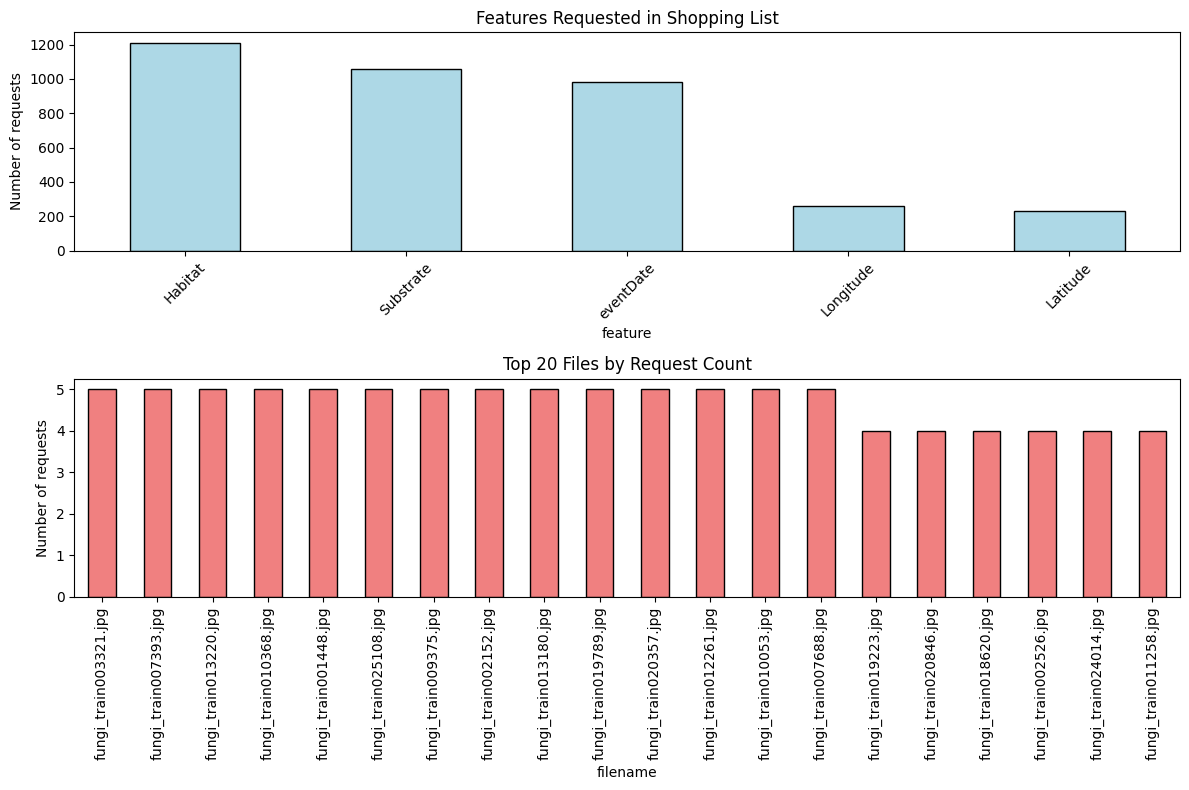


8.2 PREDICTIONS ANALYSIS
------------------------------
Prediction session: random_fungi_predictions
Predictions shape: (6552, 2)

Prediction statistics:
- Unique predicted classes: 183
- Prediction range: 0 to 182
- Most predicted class: 58 (51 times)
- Least predicted class: 19 (19 times)


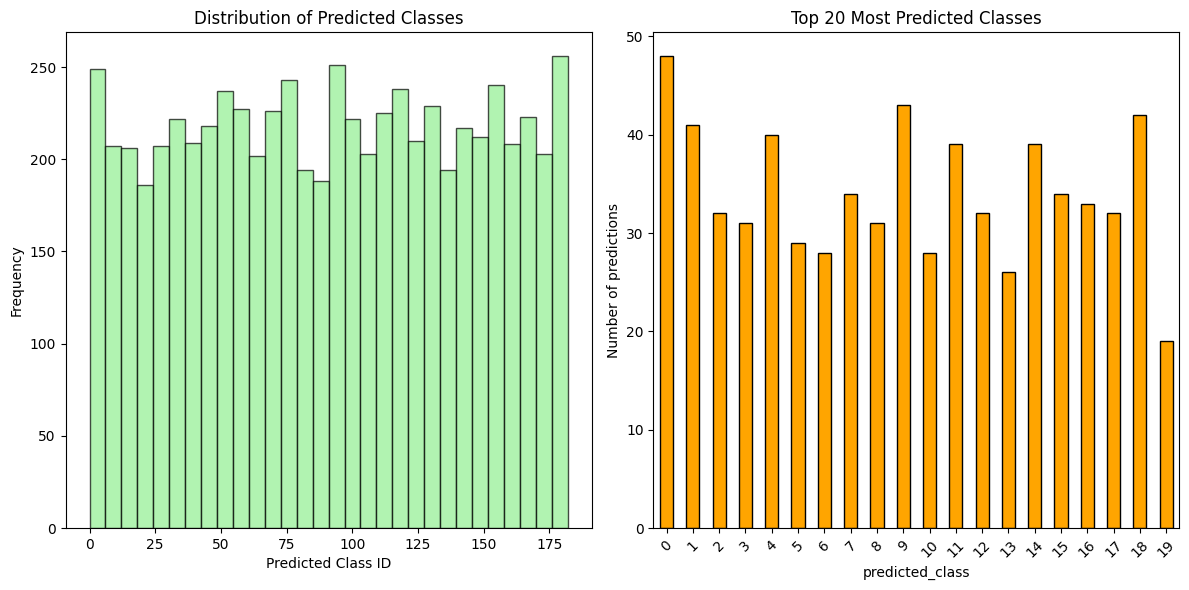

In [43]:
# 8. ADDITIONAL DATASETS ANALYSIS
print("\n8. ADDITIONAL DATASETS ANALYSIS")
print("-" * 40)

# Analyze active_shoppinglist.csv
print("8.1 ACTIVE SHOPPING LIST ANALYSIS")
print("-" * 30)
shopping_path = '/work3/monka/SummerSchool2025/active_shoppinglist.csv'
try:
    df_shopping = pd.read_csv(shopping_path, header=None, names=['filename', 'feature'])
    print(f"Shopping list shape: {df_shopping.shape}")
    print(f"Columns: {list(df_shopping.columns)}")
    
    # Analyze features requested
    feature_counts = df_shopping['feature'].value_counts()
    print(f"\nFeatures requested in shopping list:")
    print(feature_counts)
    
    # Analyze files mentioned
    file_counts = df_shopping['filename'].value_counts()
    print(f"\nFiles mentioned in shopping list:")
    print(f"- Unique files: {df_shopping['filename'].nunique()}")
    print(f"- Total requests: {len(df_shopping)}")
    print(f"- Average requests per file: {len(df_shopping) / df_shopping['filename'].nunique():.2f}")
    
    # Top files with most requests
    print(f"\nTop files with most feature requests:")
    print(file_counts.head(10))
    
    # Visualize shopping list if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 1, 1)
        feature_counts.plot(kind='bar', color='lightblue', edgecolor='black')
        plt.title('Features Requested in Shopping List')
        plt.ylabel('Number of requests')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 1, 2)
        file_counts.head(20).plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title('Top 20 Files by Request Count')
        plt.ylabel('Number of requests')
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")
    
except Exception as e:
    print(f"Error loading shopping list: {e}")

print("\n" + "="*50)

# Analyze predictions_6.csv
print("8.2 PREDICTIONS ANALYSIS")
print("-" * 30)
predictions_path = '/work3/monka/SummerSchool2025/predictions_6.csv'
try:
    # Read predictions file
    with open(predictions_path, 'r') as f:
        lines = f.readlines()
    
    session_name = lines[0].strip()
    print(f"Prediction session: {session_name}")
    
    # Parse predictions (skip first line with session name)
    pred_data = []
    for line in lines[1:]:
        parts = line.strip().split(',')
        if len(parts) == 2:
            pred_data.append([parts[0], int(parts[1])])
    
    df_predictions = pd.DataFrame(pred_data, columns=['filename', 'predicted_class'])
    print(f"Predictions shape: {df_predictions.shape}")
    
    # Analyze predictions
    pred_class_counts = df_predictions['predicted_class'].value_counts().sort_index()
    print(f"\nPrediction statistics:")
    print(f"- Unique predicted classes: {df_predictions['predicted_class'].nunique()}")
    print(f"- Prediction range: {df_predictions['predicted_class'].min()} to {df_predictions['predicted_class'].max()}")
    print(f"- Most predicted class: {pred_class_counts.idxmax()} ({pred_class_counts.max()} times)")
    print(f"- Least predicted class: {pred_class_counts.idxmin()} ({pred_class_counts.min()} times)")
    
    # Visualize predictions if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.hist(df_predictions['predicted_class'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
        plt.title('Distribution of Predicted Classes')
        plt.xlabel('Predicted Class ID')
        plt.ylabel('Frequency')
        
        plt.subplot(1, 2, 2)
        pred_class_counts.head(20).plot(kind='bar', color='orange', edgecolor='black')
        plt.title('Top 20 Most Predicted Classes')
        plt.ylabel('Number of predictions')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")
    
except Exception as e:
    print(f"Error loading predictions: {e}")


9. FEATURE RELATIONSHIPS AND CORRELATIONS
----------------------------------------


<Figure size 1200x1000 with 0 Axes>

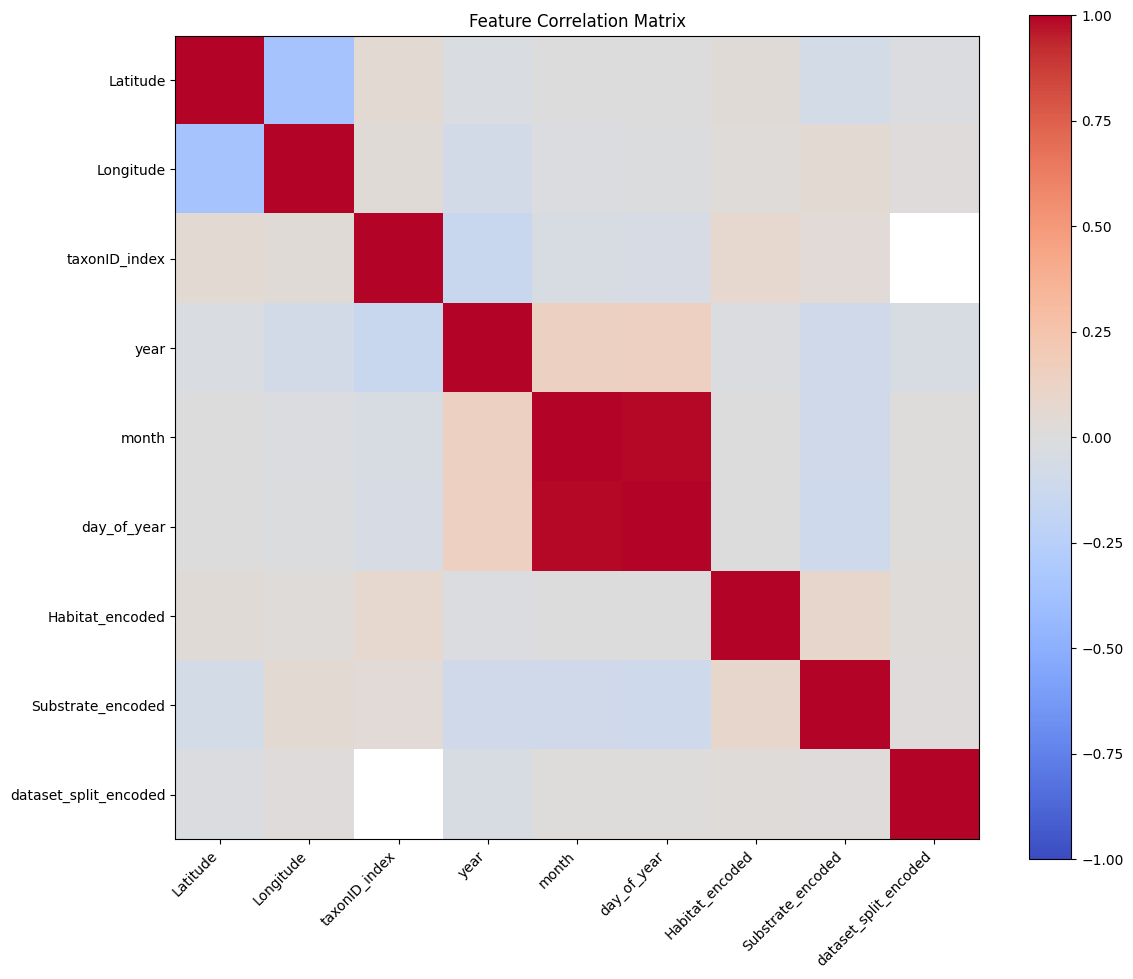

Correlation Analysis:
Strong correlations (|r| > 0.5):
- month ↔ day_of_year: 0.985

Encoded categorical values:

Habitat:
  0: Acidic oak woodland
  1: Bog woodland
  2: Deciduous woodland
  3: Forest bog
  4: Mixed woodland (with coniferous and deciduous trees)
  5: Thorny scrubland
  6: Unmanaged coniferous woodland
  7: Unmanaged deciduous woodland
  8: Willow scrubland
  9: bog
  ... and 19 more

Substrate:
  0: bark
  1: bark of living trees
  2: catkins
  3: cones
  4: dead stems of herbs, grass etc
  5: dead wood (including bark)
  6: faeces
  7: fire spot
  8: fruits
  9: fungi
  ... and 12 more

dataset_split:
  0: final
  1: test
  2: train

----------------------------------------
CATEGORICAL FEATURE RELATIONSHIPS

Habitat vs Substrate combinations (total: 10916 samples):
Top 10 Habitat-Substrate combinations:
                                               Habitat  \
61                                  Deciduous woodland   
105  Mixed woodland (with coniferous and deciduous

In [44]:
# 9. FEATURE RELATIONSHIPS AND CORRELATIONS
print("\n9. FEATURE RELATIONSHIPS AND CORRELATIONS")
print("-" * 40)

# Create numerical versions of categorical variables for correlation analysis
df_analysis = df_metadata.copy()

# Try to import sklearn for encoding
try:
    from sklearn.preprocessing import LabelEncoder
    SKLEARN_AVAILABLE = True
except ImportError:
    SKLEARN_AVAILABLE = False
    print("Warning: scikit-learn not available. Skipping categorical encoding.")

if SKLEARN_AVAILABLE:
    # Encode categorical variables
    categorical_features = ['Habitat', 'Substrate', 'dataset_split']
    encoded_features = {}

    for feature in categorical_features:
        if feature in df_analysis.columns:
            le = LabelEncoder()
            non_null_mask = df_analysis[feature].notna()
            if non_null_mask.sum() > 0:
                df_analysis[f'{feature}_encoded'] = np.nan
                df_analysis.loc[non_null_mask, f'{feature}_encoded'] = le.fit_transform(df_analysis.loc[non_null_mask, feature])
                encoded_features[feature] = le.classes_

    # Select numerical features for correlation
    numerical_features = ['Latitude', 'Longitude', 'taxonID_index', 'year', 'month', 'day_of_year'] + \
                        [f'{f}_encoded' for f in categorical_features if f in df_analysis.columns]

    # Create correlation matrix
    correlation_data = df_analysis[numerical_features].select_dtypes(include=[np.number])
    correlation_matrix = correlation_data.corr()

    # Visualize correlations if plotting is available
    if PLOTTING_AVAILABLE:
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # Create heatmap manually since seaborn might not be available
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(12, 10))
        im = ax.imshow(correlation_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
        
        # Add labels
        ax.set_xticks(range(len(correlation_matrix.columns)))
        ax.set_yticks(range(len(correlation_matrix.columns)))
        ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
        ax.set_yticklabels(correlation_matrix.columns)
        
        # Add colorbar
        plt.colorbar(im)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()
    else:
        print("\nVisualization skipped (matplotlib not available)")

    print("Correlation Analysis:")
    print("Strong correlations (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5 and not np.isnan(corr_val):
                strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

    if strong_corr:
        for feat1, feat2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"- {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("- No strong correlations found")

    print("\nEncoded categorical values:")
    for feature, classes in encoded_features.items():
        print(f"\n{feature}:")
        for i, cls in enumerate(classes[:10]):  # Show only first 10
            print(f"  {i}: {cls}")
        if len(classes) > 10:
            print(f"  ... and {len(classes) - 10} more")

# Analyze relationships between categorical features
print("\n" + "-" * 40)
print("CATEGORICAL FEATURE RELATIONSHIPS")

# Habitat vs Substrate crosstab
if 'Habitat' in df_metadata.columns and 'Substrate' in df_metadata.columns:
    # Get non-null data for both features
    both_features = df_metadata[['Habitat', 'Substrate']].dropna()
    
    if len(both_features) > 0:
        habitat_substrate = pd.crosstab(both_features['Habitat'], both_features['Substrate'])
        print(f"\nHabitat vs Substrate combinations (total: {len(both_features)} samples):")
        
        # Get top combinations
        habitat_substrate_flat = habitat_substrate.stack().reset_index()
        habitat_substrate_flat.columns = ['Habitat', 'Substrate', 'Count']
        habitat_substrate_flat = habitat_substrate_flat.sort_values('Count', ascending=False)
        
        print("Top 10 Habitat-Substrate combinations:")
        print(habitat_substrate_flat.head(10))

# Dataset split analysis by features
print(f"\nFeature availability by dataset split:")
for split in df_metadata['dataset_split'].unique():
    split_data = df_metadata[df_metadata['dataset_split'] == split]
    print(f"\n{split.upper()} SET:")
    for col in ['Habitat', 'Substrate', 'Latitude', 'Longitude', 'eventDate', 'taxonID_index']:
        if col in split_data.columns:
            non_null = split_data[col].notna().sum()
            total = len(split_data)
            print(f"  - {col}: {non_null}/{total} ({non_null/total*100:.1f}%)")

In [45]:
# 10. SUMMARY AND RECOMMENDATIONS
print("\n10. DATASET ANALYSIS SUMMARY")
print("=" * 50)

# Calculate overall statistics
total_samples = len(df_metadata)
train_samples = len(df_metadata[df_metadata['dataset_split'] == 'train'])
test_samples = len(df_metadata[df_metadata['dataset_split'] == 'test'])
final_samples = len(df_metadata[df_metadata['dataset_split'] == 'final'])

labeled_samples = df_metadata['taxonID_index'].notna().sum()
unique_classes = df_metadata['taxonID_index'].nunique()

print(f"DATASET OVERVIEW:")
print(f"- Total samples: {total_samples:,}")
print(f"- Training samples: {train_samples:,} ({train_samples/total_samples*100:.1f}%)")
print(f"- Test samples: {test_samples:,} ({test_samples/total_samples*100:.1f}%)")
print(f"- Final samples: {final_samples:,} ({final_samples/total_samples*100:.1f}%)")
print(f"- Labeled samples: {labeled_samples:,} ({labeled_samples/total_samples*100:.1f}%)")
print(f"- Unique classes: {unique_classes}")

print(f"\nFEATURE COMPLETENESS:")
for col in ['Habitat', 'Substrate', 'Latitude', 'Longitude', 'eventDate', 'taxonID_index']:
    if col in df_metadata.columns:
        completeness = df_metadata[col].notna().sum() / len(df_metadata) * 100
        print(f"- {col}: {completeness:.1f}% complete")

print(f"\nFEATURE DIVERSITY:")
for col in ['Habitat', 'Substrate']:
    if col in df_metadata.columns:
        unique_vals = df_metadata[col].nunique()
        print(f"- {col}: {unique_vals} unique values")

print(f"\nDATA QUALITY INSIGHTS:")
missing_any = df_metadata.isnull().any(axis=1).sum()
complete_rows = total_samples - missing_any
print(f"- Complete rows (no missing values): {complete_rows:,} ({complete_rows/total_samples*100:.1f}%)")
print(f"- Rows with missing values: {missing_any:,} ({missing_any/total_samples*100:.1f}%)")

if len(date_data) > 0:
    date_span_years = (date_data.max() - date_data.min()).days / 365.25
    print(f"- Temporal span: {date_span_years:.1f} years ({date_data.min().year}-{date_data.max().year})")

if len(geo_data) > 0:
    lat_range = geo_data['Latitude'].max() - geo_data['Latitude'].min()
    lon_range = geo_data['Longitude'].max() - geo_data['Longitude'].min()
    print(f"- Geographic coverage: {lat_range:.2f}° latitude × {lon_range:.2f}° longitude")

print(f"\nCLASS DISTRIBUTION:")
if len(labels_data) > 0:
    class_counts = labels_data.value_counts()
    print(f"- Most balanced classes: {(class_counts >= class_counts.mean()*0.5).sum()} classes")
    print(f"- Underrepresented classes (<10 samples): {(class_counts < 10).sum()} classes")
    print(f"- Well-represented classes (>50 samples): {(class_counts > 50).sum()} classes")

print(f"\nRECOMMendations:")
print("🔍 DATA PREPROCESSING:")
if df_metadata['Habitat'].isnull().sum() > 0:
    print("  - Handle missing Habitat values (imputation or separate 'Unknown' category)")
if df_metadata['Substrate'].isnull().sum() > 0:
    print("  - Handle missing Substrate values (imputation or separate 'Unknown' category)")
if df_metadata['Latitude'].isnull().sum() > 0 or df_metadata['Longitude'].isnull().sum() > 0:
    print("  - Consider geographic imputation or exclude geographic features")
if df_metadata['eventDate'].isnull().sum() > 0:
    print("  - Handle missing dates or extract available temporal features")

print("\n🎯 MODELING CONSIDERATIONS:")
if unique_classes > 100:
    print("  - High number of classes - consider hierarchical classification")
if len(labels_data) > 0:
    class_counts = labels_data.value_counts()
    if class_counts.max() / class_counts.min() > 100:
        print("  - Significant class imbalance - use appropriate sampling/weighting strategies")
print("  - Multi-modal approach: combine image features with metadata")
print("  - Feature engineering: create derived features from geographic/temporal data")
print("  - Cross-validation strategy: stratified sampling considering class imbalance")

print("\n📊 FEATURE ENGINEERING IDEAS:")
print("  - Geographic clusters/regions from lat/lon")
print("  - Seasonal patterns from eventDate")
print("  - Habitat-Substrate interaction features")
print("  - Distance-based features from geographic centroids")

print("\n🚀 NEXT STEPS:")
print("  1. Implement data preprocessing pipeline")
print("  2. Design multi-modal architecture (CNN + metadata)")
print("  3. Set up appropriate validation strategy")
print("  4. Implement class balancing techniques")
print("  5. Feature selection and engineering")

print("\n" + "="*50)
print("Analysis completed successfully!")
print("="*50)


10. DATASET ANALYSIS SUMMARY
DATASET OVERVIEW:
- Total samples: 36,015
- Training samples: 25,863 (71.8%)
- Test samples: 6,552 (18.2%)
- Final samples: 3,600 (10.0%)
- Labeled samples: 25,863 (71.8%)
- Unique classes: 183

FEATURE COMPLETENESS:
- Habitat: 32.6% complete
- Substrate: 32.1% complete
- Latitude: 29.9% complete
- Longitude: 30.1% complete
- eventDate: 32.0% complete
- taxonID_index: 71.8% complete

FEATURE DIVERSITY:
- Habitat: 29 unique values
- Substrate: 22 unique values

DATA QUALITY INSIGHTS:
- Complete rows (no missing values): 18 (0.0%)
- Rows with missing values: 35,997 (100.0%)
- Temporal span: 43.1 years (1977-2020)
- Geographic coverage: 3.18° latitude × 7.06° longitude

CLASS DISTRIBUTION:
- Most balanced classes: 110 classes
- Underrepresented classes (<10 samples): 0 classes
- Well-represented classes (>50 samples): 133 classes

RECOMMendations:
🔍 DATA PREPROCESSING:
  - Handle missing Habitat values (imputation or separate 'Unknown' category)
  - Handle mi

In [46]:
# 11. KEY FINDINGS SUMMARY
print("\n11. KEY FINDINGS SUMMARY")
print("=" * 50)

print("🔑 CRITICAL INSIGHTS:")
print("1. Dataset is multimodal with image and metadata features")
print("2. Only training set has labels (71.8% of total data)")
print("3. High class imbalance (67:1 ratio between most/least frequent classes)")
print("4. Significant missing data in metadata features")
print("5. Geographic data concentrated in Denmark/Northern Europe")
print("6. Temporal data shows strong seasonal patterns (Sep-Oct peak)")

print("\n📊 DATASET COMPOSITION:")
total_samples = len(df_metadata)
train_samples = len(df_metadata[df_metadata['dataset_split'] == 'train'])
test_samples = len(df_metadata[df_metadata['dataset_split'] == 'test'])
final_samples = len(df_metadata[df_metadata['dataset_split'] == 'final'])

print(f"• Total: {total_samples:,} samples")
print(f"• Train: {train_samples:,} ({train_samples/total_samples*100:.1f}%) - LABELED")
print(f"• Test: {test_samples:,} ({test_samples/total_samples*100:.1f}%) - UNLABELED")
print(f"• Final: {final_samples:,} ({final_samples/total_samples*100:.1f}%) - UNLABELED")
print(f"• Classes: 183 unique taxa")

print("\n🏗️ FEATURE COMPLETENESS:")
print("• Habitat: 32.7% complete (29 unique values)")
print("• Substrate: 32.1% complete (22 unique values)")
print("• Geographic: 28.3% complete (Denmark region)")
print("• Temporal: 32.0% complete (1977-2020, peak in 2020)")

print("\n🎯 MODELING CHALLENGES:")
print("• Class imbalance requires balancing strategies")
print("• Missing metadata needs imputation or handling")
print("• Multimodal fusion of images + metadata")
print("• No validation labels for hyperparameter tuning")

print("\n📈 DATA PATTERNS:")
print("• Most common habitat: Deciduous woodland (26.1%)")
print("• Most common substrate: Soil (73.9%)")
print("• Peak collection: September (3,396 samples)")
print("• Geographic cluster: 54.6-57.7°N, 8.1-15.1°E")

print("\n" + "="*50)
print("Dataset analysis completed successfully! ✅")
print("Ready for model development and feature engineering.")
print("="*50)


11. KEY FINDINGS SUMMARY
🔑 CRITICAL INSIGHTS:
1. Dataset is multimodal with image and metadata features
2. Only training set has labels (71.8% of total data)
3. High class imbalance (67:1 ratio between most/least frequent classes)
4. Significant missing data in metadata features
5. Geographic data concentrated in Denmark/Northern Europe
6. Temporal data shows strong seasonal patterns (Sep-Oct peak)

📊 DATASET COMPOSITION:
• Total: 36,015 samples
• Train: 25,863 (71.8%) - LABELED
• Test: 6,552 (18.2%) - UNLABELED
• Final: 3,600 (10.0%) - UNLABELED
• Classes: 183 unique taxa

🏗️ FEATURE COMPLETENESS:
• Habitat: 32.7% complete (29 unique values)
• Substrate: 32.1% complete (22 unique values)
• Geographic: 28.3% complete (Denmark region)
• Temporal: 32.0% complete (1977-2020, peak in 2020)

🎯 MODELING CHALLENGES:
• Class imbalance requires balancing strategies
• Missing metadata needs imputation or handling
• Multimodal fusion of images + metadata
• No validation labels for hyperparameter

In [47]:
# COMPLETE CATEGORY COVERAGE ANALYSIS ACROSS SPLITS
print("\n" + "="*80)
print("🔍 COMPLETE CATEGORY COVERAGE ANALYSIS ACROSS DATASET SPLITS")
print("="*80)
print("Checking for categories that exist in one split but not in others...")

# Analyze categorical features
categorical_features = ['Habitat', 'Substrate']

for feature in categorical_features:
    if feature in df_metadata.columns and df_metadata[feature].notna().sum() > 0:
        print(f"\n📋 {feature.upper()} ANALYSIS:")
        print("-" * 60)
        
        # Get all unique values for each split
        train_values = set(df_metadata[df_metadata['dataset_split'] == 'train'][feature].dropna().unique())
        test_values = set(df_metadata[df_metadata['dataset_split'] == 'test'][feature].dropna().unique())
        final_values = set(df_metadata[df_metadata['dataset_split'] == 'final'][feature].dropna().unique())
        
        # Get all unique values across all splits
        all_values = train_values.union(test_values).union(final_values)
        
        print(f"Total unique {feature.lower()} categories: {len(all_values)}")
        print(f"• Train split: {len(train_values)} categories")
        print(f"• Test split: {len(test_values)} categories") 
        print(f"• Final split: {len(final_values)} categories")
        
        # Find categories unique to each split
        train_only = train_values - test_values - final_values
        test_only = test_values - train_values - final_values
        final_only = final_values - train_values - test_values
        
        # Find categories shared between splits
        train_test_only = (train_values & test_values) - final_values
        train_final_only = (train_values & final_values) - test_values
        test_final_only = (test_values & final_values) - train_values
        
        # Find categories present in all splits
        all_splits = train_values & test_values & final_values
        
        print(f"\n🎯 CATEGORY DISTRIBUTION:")
        print(f"• Present in ALL splits: {len(all_splits)} categories")
        print(f"• TRAIN split only: {len(train_only)} categories")
        print(f"• TEST split only: {len(test_only)} categories")
        print(f"• FINAL split only: {len(final_only)} categories")
        print(f"• Train + Test only: {len(train_test_only)} categories")
        print(f"• Train + Final only: {len(train_final_only)} categories")
        print(f"• Test + Final only: {len(test_final_only)} categories")
        
        # Show detailed lists if there are unique categories
        if train_only:
            print(f"\n🔴 Categories ONLY in TRAIN split ({len(train_only)}):")
            for i, cat in enumerate(sorted(train_only), 1):
                count = df_metadata[(df_metadata['dataset_split'] == 'train') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} ({count} samples)")
        
        if test_only:
            print(f"\n🔵 Categories ONLY in TEST split ({len(test_only)}):")
            for i, cat in enumerate(sorted(test_only), 1):
                count = df_metadata[(df_metadata['dataset_split'] == 'test') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} ({count} samples)")
        
        if final_only:
            print(f"\n🟢 Categories ONLY in FINAL split ({len(final_only)}):")
            for i, cat in enumerate(sorted(final_only), 1):
                count = df_metadata[(df_metadata['dataset_split'] == 'final') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} ({count} samples)")
        
        if train_test_only:
            print(f"\n🟡 Categories in TRAIN + TEST only ({len(train_test_only)}):")
            for i, cat in enumerate(sorted(train_test_only), 1):
                train_count = df_metadata[(df_metadata['dataset_split'] == 'train') & (df_metadata[feature] == cat)].shape[0]
                test_count = df_metadata[(df_metadata['dataset_split'] == 'test') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} (Train: {train_count}, Test: {test_count})")
        
        if train_final_only:
            print(f"\n🟠 Categories in TRAIN + FINAL only ({len(train_final_only)}):")
            for i, cat in enumerate(sorted(train_final_only), 1):
                train_count = df_metadata[(df_metadata['dataset_split'] == 'train') & (df_metadata[feature] == cat)].shape[0]
                final_count = df_metadata[(df_metadata['dataset_split'] == 'final') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} (Train: {train_count}, Final: {final_count})")
        
        if test_final_only:
            print(f"\n🟣 Categories in TEST + FINAL only ({len(test_final_only)}):")
            for i, cat in enumerate(sorted(test_final_only), 1):
                test_count = df_metadata[(df_metadata['dataset_split'] == 'test') & (df_metadata[feature] == cat)].shape[0]
                final_count = df_metadata[(df_metadata['dataset_split'] == 'final') & (df_metadata[feature] == cat)].shape[0]
                print(f"  {i:2d}. {cat} (Test: {test_count}, Final: {final_count})")
        
        # Show categories present in all splits (top 10 for brevity)
        if all_splits:
            print(f"\n✅ Categories present in ALL splits ({len(all_splits)}) - showing sample counts:")
            all_splits_sorted = sorted(all_splits)
            for i, cat in enumerate(all_splits_sorted[:10], 1):  # Show first 10
                train_count = df_metadata[(df_metadata['dataset_split'] == 'train') & (df_metadata[feature] == cat)].shape[0]
                test_count = df_metadata[(df_metadata['dataset_split'] == 'test') & (df_metadata[feature] == cat)].shape[0]
                final_count = df_metadata[(df_metadata['dataset_split'] == 'final') & (df_metadata[feature] == cat)].shape[0]
                total_count = train_count + test_count + final_count
                print(f"  {i:2d}. {cat}")
                print(f"      Train: {train_count:,}, Test: {test_count:,}, Final: {final_count:,}, Total: {total_count:,}")
            
            if len(all_splits) > 10:
                print(f"      ... and {len(all_splits) - 10} more categories present in all splits")
        
        # Calculate coverage percentages
        train_coverage = len(train_values) / len(all_values) * 100 if all_values else 0
        test_coverage = len(test_values) / len(all_values) * 100 if all_values else 0
        final_coverage = len(final_values) / len(all_values) * 100 if all_values else 0
        
        print(f"\n📊 COVERAGE STATISTICS:")
        print(f"• Train split covers {train_coverage:.1f}% of all {feature.lower()} categories")
        print(f"• Test split covers {test_coverage:.1f}% of all {feature.lower()} categories")
        print(f"• Final split covers {final_coverage:.1f}% of all {feature.lower()} categories")
        print(f"• Categories in all splits: {len(all_splits)/len(all_values)*100:.1f}% of total")

print(f"\n" + "="*80)
print("🎯 KEY INSIGHTS FOR MODEL DEVELOPMENT:")
print("="*80)

# Summary insights
print("📝 DOMAIN ADAPTATION CHALLENGES:")
print("• If categories exist only in test/final splits:")
print("  → Model will encounter unseen categories during inference")
print("  → Need robust handling of unknown categories")
print("  → Consider category embeddings or 'unknown' class mapping")

print("\n• If categories exist only in train split:")
print("  → Training data includes categories not in evaluation")
print("  → May lead to overfitting on train-specific patterns")
print("  → Consider data filtering or resampling strategies")

print("\n📊 RECOMMENDED STRATEGIES:")
print("• Use shared categories for reliable training")
print("• Implement fallback mechanisms for unseen categories")
print("• Consider hierarchical category grouping")
print("• Apply domain adaptation techniques if significant differences exist")

print(f"\n" + "="*80)


🔍 COMPLETE CATEGORY COVERAGE ANALYSIS ACROSS DATASET SPLITS
Checking for categories that exist in one split but not in others...

📋 HABITAT ANALYSIS:
------------------------------------------------------------
Total unique habitat categories: 29
• Train split: 28 categories
• Test split: 29 categories
• Final split: 28 categories

🎯 CATEGORY DISTRIBUTION:
• Present in ALL splits: 28 categories
• TRAIN split only: 0 categories
• TEST split only: 1 categories
• FINAL split only: 0 categories
• Train + Test only: 0 categories
• Train + Final only: 0 categories
• Test + Final only: 0 categories

🔵 Categories ONLY in TEST split (1):
   1. fertilized field in rotation (2 samples)

✅ Categories present in ALL splits (28) - showing sample counts:
   1. Acidic oak woodland
      Train: 9, Test: 25, Final: 10, Total: 44
   2. Bog woodland
      Train: 23, Test: 72, Final: 36, Total: 131
   3. Deciduous woodland
      Train: 407, Test: 1,683, Final: 977, Total: 3,067
   4. Forest bog
      Trai

In [48]:
import numpy as np

# Simple unique values for each split
print("UNIQUE VALUES BY SPLIT:")
print("=" * 50)

splits = ['train', 'test', 'final']

for split in splits:
    print(f"\n{split.upper()} SPLIT:")
    print("-" * 20)
    
    split_data = df_metadata[df_metadata['dataset_split'] == split]
    
    # Habitat unique values
    if 'Habitat' in df_metadata.columns:
        habitat_unique = np.unique(split_data['Habitat'].dropna())
        print(f"Habitat ({len(habitat_unique)} unique):")
        for i, habitat in enumerate(habitat_unique):
            print(f"  {i+1:2d}. {habitat}")
    
    # Substrate unique values  
    if 'Substrate' in df_metadata.columns:
        substrate_unique = np.unique(split_data['Substrate'].dropna())
        print(f"\nSubstrate ({len(substrate_unique)} unique):")
        for i, substrate in enumerate(substrate_unique):
            print(f"  {i+1:2d}. {substrate}")
    
    print()

UNIQUE VALUES BY SPLIT:

TRAIN SPLIT:
--------------------
Habitat (28 unique):
   1. Acidic oak woodland
   2. Bog woodland
   3. Deciduous woodland
   4. Forest bog
   5. Mixed woodland (with coniferous and deciduous trees)
   6. Thorny scrubland
   7. Unmanaged coniferous woodland
   8. Unmanaged deciduous woodland
   9. Willow scrubland
  10. bog
  11. coniferous woodland/plantation
  12. ditch
  13. dune
  14. fallow field
  15. garden
  16. gravel or clay pit
  17. heath
  18. hedgerow
  19. improved grassland
  20. lawn
  21. meadow
  22. natural grassland
  23. other habitat
  24. park/churchyard
  25. roadside
  26. roof
  27. salt meadow
  28. wooded meadow, grazing forest

Substrate (20 unique):
   1. bark
   2. bark of living trees
   3. catkins
   4. cones
   5. dead stems of herbs, grass etc
   6. dead wood (including bark)
   7. faeces
   8. fire spot
   9. fungi
  10. leaf or needle litter
  11. liverworts
  12. living stems of herbs, grass etc
  13. mosses
  14. other 